# Making stacked histograms
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- uses `plot_hists()` to make stacked histograms

In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'had': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [7]:
 # define your regions here
presel = {
        "mu": {
            "tagger>0.50": "THWW>0.50",
#             "msoftdrop": "fj_mass>40",
#             "met": "met_pt>35", 0.2
        },
        "ele": {
            "tagger>0.50": "THWW>0.50",
#             "msoftdrop": "fj_mass>40",
#             "met": "met_pt>55",
#             "lepmiso": "(lep_pt<120) | ( (lep_pt>120) & (lep_misolation<0.2))",
        },
}

channels = ["ele", "mu"]
# channels = ["ele"]
samples = [
    "ggF", 
    "VBF",  
    "WH",
    "ZH",    
    "ttH",
    "QCD",
    "WJetsLNu",
    "TTbar",
    "SingleTop",
    "WZQQorDYJets",    
    "Diboson",
    "EWKvjets",    
    "Data",
]
years = ["2017"]

In [8]:
events_dict = {}

In [9]:
samples_dir = {
    "2017":    "../eos/Feb9_2017",
}

from make_stacked_hists_LPvalidation import make_events_dict

events_dict = {}
for year in years:
    
    out = make_events_dict([year], channels, samples_dir[year], samples, presel)
    events_dict = {**events_dict, **out}

INFO:root:Finding VBFHToWWToAny_M-125_TuneCP5_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 1663 events
INFO:root:Will fill the VBF dataframe with the remaining 830 events
INFO:root:tot event weight 7.105177814744548 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 69 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1 events
INFO:root:tot event weight 1.6639318904239442 

INFO:root:Finding EWKWminus_WToLNu samples and should combine them under EWKvjets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 1897 events
INFO:root:Will fill the EWKvjets dataframe with the remaining 125 events
INFO:root:tot event weight 38.42504771790098 

INFO:root:Finding EWKZ_ZToNuNu samples and should combine 

Skipping sample VBFHToWWToLNuQQ_M-125_withDipoleRecoil


INFO:root:Applying tagger>0.50 selection on 111882 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 8388 events
INFO:root:tot event weight 452.9656155260729 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 351636 events
INFO:root:Will fill the TTbar dataframe with the remaining 10140 events
INFO:root:tot event weight 1244.2300824368485 

INFO:root:Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 23539 events
INFO:root:Will fill the SingleTop dataframe with the remaining 352 events
INFO:root:tot event weight 9.927967355672953 

INFO:root:Finding ST_s-channel_4f_hadronicDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection

INFO:root:tot event weight 91.94332892725983 

INFO:root:Finding QCD_Pt_2400to3200 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 261 events
INFO:root:Will fill the QCD dataframe with the remaining 0 events
INFO:root:tot event weight 0.0 

INFO:root:Finding EWKZ_ZToQQ samples and should combine them under EWKvjets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 88 events
INFO:root:Will fill the EWKvjets dataframe with the remaining 3 events
INFO:root:tot event weight 0.09966589091019065 

INFO:root:Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQorDYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 70 events
INFO:root:Will fill the WZQQorDYJets dataframe with the remaining 1 events
INFO:root:tot event weight 0.45350642044630973 

INFO:root:Finding ZZ samples and should combine them un

INFO:root:Will fill the QCD dataframe with the remaining 7 events
INFO:root:tot event weight 0.01693543796577055 

INFO:root:Finding SingleMuon_Run2017F samples and should combine them under Data
INFO:root:Finding VBFHToWWToAny_M-125_TuneCP5_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 2479 events
INFO:root:Will fill the VBF dataframe with the remaining 1335 events
INFO:root:tot event weight 11.019930884084777 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 79 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3 events
INFO:root:tot event weight 4.872620141481636 

INFO:root:Finding EWKWminus_WToLNu samples and should combine them under EWKvjets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 select

Skipping sample VBFHToWWToLNuQQ_M-125_withDipoleRecoil


INFO:root:Applying tagger>0.50 selection on 148852 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 13308 events
INFO:root:tot event weight 726.4688839403857 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 371796 events
INFO:root:Will fill the TTbar dataframe with the remaining 11489 events
INFO:root:tot event weight 1338.1134315209308 

INFO:root:Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 34606 events
INFO:root:Will fill the SingleTop dataframe with the remaining 484 events
INFO:root:tot event weight 13.605364343809459 

INFO:root:Finding ST_s-channel_4f_hadronicDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selecti

INFO:root:tot event weight 79.00939110277554 

INFO:root:Finding QCD_Pt_2400to3200 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 149 events
INFO:root:Will fill the QCD dataframe with the remaining 2 events
INFO:root:tot event weight 0.00014599225661598406 

INFO:root:Finding EWKZ_ZToQQ samples and should combine them under EWKvjets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 63 events
INFO:root:Will fill the EWKvjets dataframe with the remaining 2 events
INFO:root:tot event weight 0.07660557513593472 

INFO:root:Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQorDYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying tagger>0.50 selection on 61 events
INFO:root:Will fill the WZQQorDYJets dataframe with the remaining 1 events
INFO:root:tot event weight 0.425185533433758 

INFO:root:Finding ZZ samples and shoul

INFO:root:Finding SingleMuon_Run2017F samples and should combine them under Data
INFO:root:Applying tagger>0.50 selection on 35806 events
INFO:root:Will fill the Data dataframe with the remaining 2277 events
INFO:root:tot event weight 2277.0 



# Stacked hists

In [10]:
def fix_neg_yields(h):
    """
    Will set the bin yields of a process to 0 if the nominal yield is negative, and will
    set the yield to 0 for the full Systematic axis.
    """
    for sample in h.axes["samples"]:
        neg_bins = np.where(h[{"samples": sample}].values() < 0)[0]

        if len(neg_bins) > 0:
            print(f"{sample}, has {len(neg_bins)} bins with negative yield.. will set them to 0")

            sample_index = np.argmax(np.array(h.axes["samples"]) == sample)

            for neg_bin in neg_bins:
                h.view(flow=True)[sample_index, neg_bin + 1] = (0, 0)

In [78]:
vars_to_plot = [
#     "THWW",

    "rec_higgs_m",

#     "fj_ParT_mass",

#     "FirstFatjet_pt",
#     "SecondFatjet_pt",
#     "fj_pt",
#     "lep_pt",
#     "NumFatjets",
#     "NumOtherJets",
#     "lep_fj_dr",
#     "met_pt",
#     "met_fj_dphi",
#     "lep_met_mt",    
#     "ht",
#     "fj_mass",
#     "rec_W_qq_m",
#     "rec_W_lnu_m",
]

samples_to_plot = [
    "ggF", 
    "VBF",
    "ttH",
    "WH",
    "ZH",
    "QCD",
    "SingleTop",
    "Diboson",
#     "EWKvjets",
    "Data",
    "WJetsLNu",
    "WZQQorDYJets",  
    "TTbar",
#     "TTbar_allmatched",
#     "TTbar_unmatched",
]

# samples_to_plot = ["QCD"]

In [79]:
tagger = "THWW"

presel = {
#     "Pre-selection": f"({tagger}>0.5)",   # dummy
    
#     "SR": f"{tagger}>{tagger_cut} & (n_bjets_T==0)",
    "Top CR": f"({tagger}>0.5) & (n_bjets_T>0)",
#     "WJets CR": f"({tagger}<{tagger_cut}) & ({tagger}>0.8) & (n_bjets_T==0) & met_pt>100",
}


channels = ["ele", "mu"]
# channels = ["mu"]
years = ["2017"]

# fill histograms
hists = {}

import utils

massbin = 10
for var in vars_to_plot:

    if var == "rec_higgs_m":
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Variable(list(range(55, 255, massbin)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),            
        )       
    else:
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            utils.axis_dict[var],
            storage=hist2.storage.Weight(),            
        )        
        
    for sample in samples_to_plot:
        for year in years:
            for ch in channels:
            
                region, sel = list(presel.items())[0]

#                 if "TTbar" in sample:
#                     df = events_dict[year][ch]["TTbar"]
                    
#                     if "TTbar_allmatched" in sample:
#                         df = df[df["fj_Top_nquarksnob"]>=2]
#                         df["event_weight"] *= 0.887
# #                         df = df[df["fj_isTop_W_lep_b"]==1]
                        

#                     else:
# #                         df = df[df["fj_isTop_W_lep_b"]!=1]                        
#                         df = df[df["fj_Top_nquarksnob"]<2]
              
#                 else:
#                     df = events_dict[year][ch][sample]

                df = events_dict[year][ch][sample]
                        
                df = df.query(sel)

                x = df[var]
                w = df["event_weight"]

                hists[var].fill(
                    samples=sample,
                    var=x,
                    weight=w,
                )
    
for var in vars_to_plot:
    fix_neg_yields(hists[var])

WZQQorDYJets, has 3 bins with negative yield.. will set them to 0


Will plot rec_higgs_m histogram


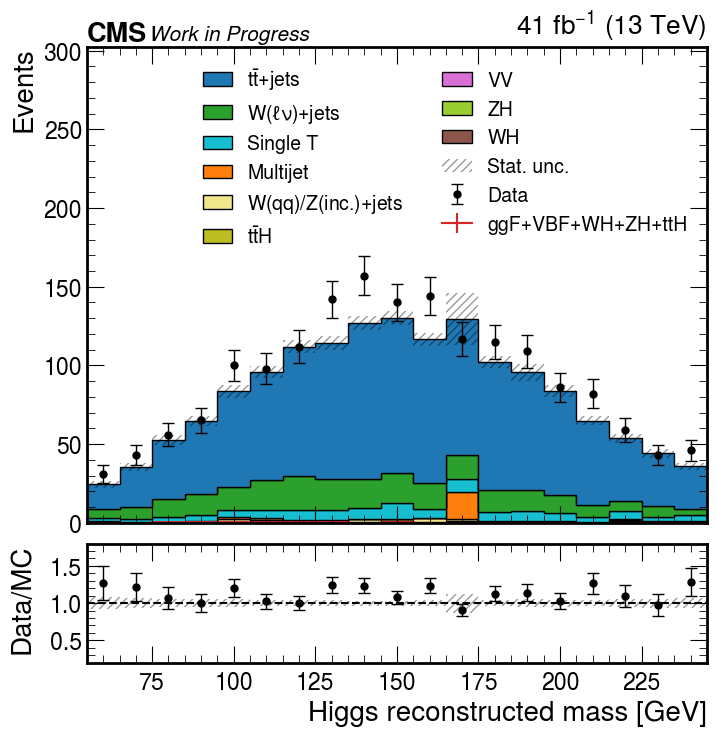

In [80]:
plt.rcParams.update({"font.size": 20})
add_data = True

if "SR" in region or ("Signal region") in region:
    add_soverb=True
    blind_region=[90,160]
    if "SR1" in region:
        mult=5
    else:
        mult=10
else:
    add_soverb=True
    blind_region=False
    mult=1
    
if "CR" in region:
    blind_region = False
    mult = 1


from utils import plot_hists as plot_hists    

PATH = f"/Users/fmokhtar/Desktop/AN_2024/lol/"

if not os.path.exists(PATH):
    # Create the directory
    os.makedirs(PATH)    

plot_hists(hists, years, channels, vars_to_plot,             
            add_data=add_data,
            logy=False,
            add_soverb=add_soverb,
            only_sig=False,
            mult=mult,
            outpath=PATH,
#             text_=f"{ch} channel",
#             text_=region + f"\n {list(categories_sel.keys())[0]} category",
#             text_=region + f"\n category: {list(categories_sel.keys())[0]} \n Applying qcd event_weight<{threshold}",
#             text_=region + f"\n Applying qcd event_weight<{threshold}",

            blind_region=blind_region,
#            save_as=f"{years[0]}_{channels[0]}"
#            save_as=f"{ch}"
           
          )

In [141]:
df = events_dict["2017"]["mu"]["TTbar"]
msk = df["THWW"]>0.8 
np.unique(df["fj_Top_nquarksnob"][msk], return_counts=True)

(array([0, 1, 2]), array([1316,  743, 1290]))

In [122]:
hists['rec_higgs_m'][{"samples": "QCD"}].values().sum()

238.53698055374855

In [229]:
tagger = "THWW"

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

massbin = 10
tagger_cuts = [
    0,
    0.1,
#     0.2,
    0.3,
#     0.4,
    0.5,
#     0.6,
    0.7,
#     0.8,
    0.9,
]
hists_M = {}

for tagger_cut in tagger_cuts:

    hists_M[tagger_cut] = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(55, 255, massbin)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True),
        storage=hist2.storage.Weight(),            
    )       

    for sample in samples_to_plot:
        for year in years:
            for ch in channels:
            
                region, sel = list(presel.items())[0]

                df = events_dict[year][ch][sample]
                
                df = df[df["THWW"]>tagger_cut]

                x = df[var]
                w = df["event_weight"]
                
                hists_M[tagger_cut].fill(
                    samples=sample,
                    var=x,
                    weight=w,
                )     

    fix_neg_yields(hists_M[tagger_cut])

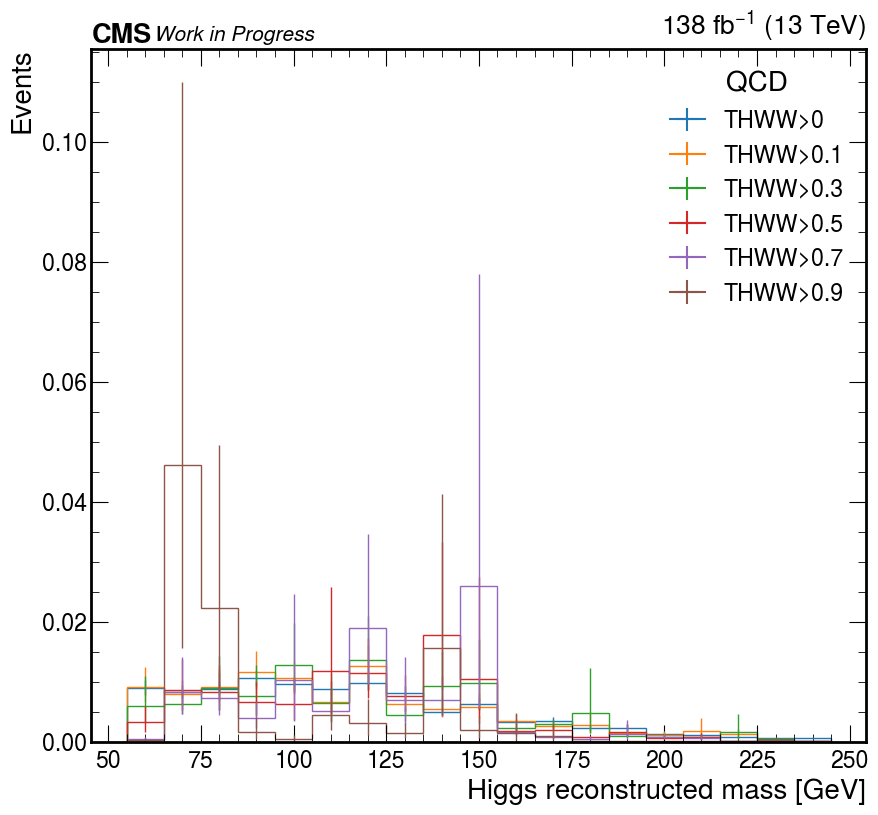

In [253]:
# different regions
samples = [
#     "WJetsLNu",
#     "TTbar",
    "QCD",
]

for sample in samples:

    fig, ax = plt.subplots(figsize=(10, 9))

    for tagger_cut in hists_M:
#         if tagger_cut>0.4:
#             continue
            
        hep.histplot(
            hists_M[tagger_cut][{"samples": sample}],
            ax=ax,
            density=True,
            linewidth=1,
            label=f"THWW>{tagger_cut}",
            flow="none",
        )


    ax.set_xlabel(hists_M[tagger_cut].axes.label[1])
    ax.legend(title=sample)
    ax.set_ylabel("Events")

    lum_=0
    for year in years:
        lum = 0
        for ch in channels:
            with open("../fileset/luminosity.json") as f:
                lum += json.load(f)[ch][year] / 1000.0

        lum_ += lum / len(channels)

    hep.cms.lumitext("%.0f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
    hep.cms.text("Work in Progress", ax=ax, fontsize=15)

In [40]:
df = pd.read_parquet("/Users/fmokhtar/Downloads/outfiles/0-1_ele.parquet")

In [41]:
for key in df:
    print(key)

lep_pt
lep_eta
lep_isolation
lep_misolation
lep_fj_dr
lep_met_mt
met_fj_dphi
met_pt
deta
mjj
ht
n_bjets_L
n_bjets_M
n_bjets_T
fj_lsf3
NumFatjets
NumOtherJets
FirstFatjet_pt
FirstFatjet_eta
FirstFatjet_phi
FirstFatjet_msd
SecondFatjet_pt
SecondFatjet_eta
SecondFatjet_phi
SecondFatjet_msd
rec_higgs_m
rec_higgs_pt
rec_W_qq_m
rec_W_qq_pt
rec_W_lnu_m
rec_W_lnu_pt
fj_genH_pt
fj_genH_jet
fj_genV_dR
fj_genVstar
genV_genVstar_dR
fj_nquarks
fj_ncquarks
fj_lepinprongs
fj_H_VV_4q
fj_H_VV_elenuqq
fj_H_VV_munuqq
fj_H_VV_taunuqq
fj_H_VV_lep
fj_H_VV_isVlepton
fj_H_VV_isVstarlepton
fj_H_VV
fj_H_VV_isMatched
gen_Vlep_pt
genlep_dR_fj
fj_genRes_mass
genlep_dR_fjpt
fj_isggF
fj_genjetmass
fj_genjetpt
weight_ewkcorr
weight_qcdcorr
weight_altqcdcorr
weight_scale0
weight_scale1
weight_scale3
weight_scale5
weight_scale7
weight_scale8
weight_scale4
weight_pdf0
weight_pdf1
weight_pdf2
weight_pdf3
weight_pdf4
weight_pdf5
weight_pdf6
weight_pdf7
weight_pdf8
weight_pdf9
weight_pdf10
weight_pdf11
weight_pdf12
weight_

In [15]:
! ls ../eos/Feb9_2017/QCD_Pt_1000to1400/outfiles/0-15_ele.parquet

0-15.pkl            165-180.pkl         255-270.pkl         330-345.pkl
0-15_ele.parquet    165-180_ele.parquet 255-270_ele.parquet 330-345_ele.parquet
0-15_mu.parquet     165-180_mu.parquet  255-270_mu.parquet  330-345_mu.parquet
105-120.pkl         180-195.pkl         270-285.pkl         45-60.pkl
105-120_ele.parquet 180-195_ele.parquet 270-285_ele.parquet 45-60_ele.parquet
105-120_mu.parquet  180-195_mu.parquet  270-285_mu.parquet  45-60_mu.parquet
120-135.pkl         195-210.pkl         285-300.pkl         60-75.pkl
120-135_ele.parquet 195-210_ele.parquet 285-300_ele.parquet 60-75_ele.parquet
120-135_mu.parquet  195-210_mu.parquet  285-300_mu.parquet  60-75_mu.parquet
135-150.pkl         210-225.pkl         30-45.pkl           75-90.pkl
135-150_ele.parquet 210-225_ele.parquet 30-45_ele.parquet   75-90_ele.parquet
135-150_mu.parquet  210-225_mu.parquet  30-45_mu.parquet    75-90_mu.parquet
15-30.pkl           225-240.pkl         300-315.pkl         90-105.pkl
15-30_ele.parquet   225

In [16]:
df = pd.read_parquet("../eos/Feb9_2017/QCD_Pt_1000to1400/outfiles/0-15_ele.parquet")

In [19]:
df["fj_pt"]

0      686.997925
1     1299.212524
2     1020.104614
3      430.419830
4     1020.620789
5     1277.179565
6     1553.065796
7     1585.515991
8     1091.156372
9     1116.250244
10     999.326660
11    1455.434204
12    1128.448975
13     937.976013
14     893.440186
15    1266.838745
Name: fj_pt, dtype: float32

In [20]:
df["fj_eta"]

0    -0.994873
1     0.832031
2     1.378174
3     1.572021
4    -1.097656
5    -1.471436
6     1.185547
7    -1.442139
8     0.603394
9     0.498413
10    1.180908
11    0.530396
12    1.121826
13   -1.193604
14    0.798706
15   -0.561157
Name: fj_eta, dtype: float32

In [21]:
df["fj_phi"]

0    -2.451172
1     0.786743
2    -2.538086
3    -1.435059
4     0.043030
5     2.795410
6     1.931396
7     2.848145
8     2.800293
9    -0.027325
10    0.835938
11    2.435059
12    0.935547
13   -1.933838
14   -2.079590
15   -1.020996
Name: fj_phi, dtype: float32

In [26]:
df["fj_mass"]

0     116.233372
1     328.750886
2     370.511916
3     100.815493
4     136.133319
5     198.030987
6     457.777069
7     331.145072
8     265.046692
9     246.085946
10    127.447556
11    258.836696
12    366.989057
13    302.134231
14      0.182835
15    307.161488
Name: fj_mass, dtype: float64

In [452]:
w = np.concatenate([df["lep_pt"].values.reshape(-1,1), df["fj_isggF"].values.reshape(-1,1)], axis=1)

In [455]:
w.shape

(205, 2)

In [456]:
a = {}

In [161]:
 df.loc[:, df.columns.str.contains("pdf")]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,1.0,1.000854,0.999420,1.002441,0.998871,1.005310,0.999298,1.003601,1.003235,1.000183,...,1.000000,1.000183,1.000427,0.999878,0.999969,0.999939,1.000305,1.0,0.953278,1.044189
9,1.0,0.999329,0.999237,0.998352,1.003235,0.993744,1.001465,0.997894,0.997833,0.996094,...,0.999054,1.000183,1.000671,0.999634,1.000549,1.000305,1.000244,1.0,0.951813,1.047424
10,1.0,0.998413,0.997772,0.999268,1.004089,0.997894,1.002625,1.002136,1.002136,1.001221,...,0.999756,1.000061,1.000366,0.999847,1.000244,0.999939,1.000183,1.0,0.964233,1.040344
11,1.0,0.997833,0.998383,1.002014,1.001526,0.997437,1.000916,0.996887,0.997986,0.999603,...,0.999817,1.000183,1.000366,0.999847,1.000244,0.999847,1.000183,1.0,0.958893,1.049622
16,1.0,0.992706,1.011902,0.990753,0.994843,1.000854,1.006653,1.015930,1.015137,0.987701,...,1.000488,1.005310,1.001831,0.993835,0.999817,0.999756,1.003174,1.0,0.968262,1.058899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,1.0,0.998535,0.998047,0.998718,1.003418,0.997284,1.002136,0.999634,0.999847,1.001465,...,0.999725,1.000122,1.000427,0.999786,1.000305,0.999939,1.000183,1.0,0.961395,1.046387
4729,1.0,1.000366,0.998840,1.002319,0.998566,1.004761,1.000244,1.002441,1.003357,0.998444,...,0.999756,1.000244,1.000366,0.999664,0.999695,1.000000,1.000366,1.0,0.957153,1.042664
4731,1.0,0.999481,0.999023,0.997711,1.004395,0.995148,1.001526,1.000061,1.000610,0.998596,...,0.999298,1.000000,1.000549,0.999664,1.000366,1.000183,1.000244,1.0,0.955902,1.040771
4735,1.0,1.000916,0.999298,1.001526,0.998199,1.004517,0.999084,1.000305,1.000793,1.000427,...,0.999908,1.000244,1.000488,0.999847,0.999939,0.999908,1.000305,1.0,0.952576,1.047546


In [273]:
 df.loc[:, df.columns.str.contains("scale")]

,weight_scale0,weight_scale1,weight_scale3,weight_scale5,weight_scale7,weight_scale8,weight_scale4
2,1.167725,1.166687,1.006165,0.995850,0.848999,0.841797,1.0
9,1.267029,1.187561,1.077271,0.938354,0.851349,0.792694,1.0
10,1.129700,1.132446,1.017456,0.985352,0.865570,0.843018,1.0
11,1.278687,1.208496,1.068237,0.942932,0.830566,0.778015,1.0
16,1.147217,1.134705,1.024353,0.980072,0.866211,0.841827,1.0
...,...,...,...,...,...,...,...
4727,1.246704,1.183411,1.063904,0.947998,0.841705,0.792389,1.0
4729,1.177246,1.184082,1.006409,0.995178,0.842255,0.831390,1.0
4731,1.052063,1.087402,1.004089,0.992920,0.886353,0.864349,1.0
4735,1.237488,1.197327,1.039795,0.966797,0.836151,0.804718,1.0


In [274]:
 df.loc[:, df.columns.str.contains("pdf")]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,1.0,1.000854,0.999420,1.002441,0.998871,1.005310,0.999298,1.003601,1.003235,1.000183,...,1.000000,1.000183,1.000427,0.999878,0.999969,0.999939,1.000305,1.0,0.953278,1.044189
9,1.0,0.999329,0.999237,0.998352,1.003235,0.993744,1.001465,0.997894,0.997833,0.996094,...,0.999054,1.000183,1.000671,0.999634,1.000549,1.000305,1.000244,1.0,0.951813,1.047424
10,1.0,0.998413,0.997772,0.999268,1.004089,0.997894,1.002625,1.002136,1.002136,1.001221,...,0.999756,1.000061,1.000366,0.999847,1.000244,0.999939,1.000183,1.0,0.964233,1.040344
11,1.0,0.997833,0.998383,1.002014,1.001526,0.997437,1.000916,0.996887,0.997986,0.999603,...,0.999817,1.000183,1.000366,0.999847,1.000244,0.999847,1.000183,1.0,0.958893,1.049622
16,1.0,0.992706,1.011902,0.990753,0.994843,1.000854,1.006653,1.015930,1.015137,0.987701,...,1.000488,1.005310,1.001831,0.993835,0.999817,0.999756,1.003174,1.0,0.968262,1.058899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,1.0,0.998535,0.998047,0.998718,1.003418,0.997284,1.002136,0.999634,0.999847,1.001465,...,0.999725,1.000122,1.000427,0.999786,1.000305,0.999939,1.000183,1.0,0.961395,1.046387
4729,1.0,1.000366,0.998840,1.002319,0.998566,1.004761,1.000244,1.002441,1.003357,0.998444,...,0.999756,1.000244,1.000366,0.999664,0.999695,1.000000,1.000366,1.0,0.957153,1.042664
4731,1.0,0.999481,0.999023,0.997711,1.004395,0.995148,1.001526,1.000061,1.000610,0.998596,...,0.999298,1.000000,1.000549,0.999664,1.000366,1.000183,1.000244,1.0,0.955902,1.040771
4735,1.0,1.000916,0.999298,1.001526,0.998199,1.004517,0.999084,1.000305,1.000793,1.000427,...,0.999908,1.000244,1.000488,0.999847,0.999939,0.999908,1.000305,1.0,0.952576,1.047546


In [294]:
nominal = df["event_weight"]
nominal

2       0.007575
9       0.008623
10      0.008213
11      0.008169
16      0.007928
          ...   
4727    0.006962
4729    0.007942
4731    0.006816
4735    0.009402
4738    0.007878
Name: event_weight, Length: 1434, dtype: float64

In [295]:
pdfweights = nominal.values.reshape(-1,1) * df.loc[:, df.columns.str.contains("pdf")].values
pdfweights

array([[0.00757504, 0.00758152, 0.00757065, ..., 0.00757504, 0.00722112,
        0.00790978],
       [0.00862349, 0.0086177 , 0.00861691, ..., 0.00862349, 0.00820794,
        0.00903245],
       [0.00821303, 0.0082    , 0.00819473, ..., 0.00821303, 0.00791928,
        0.00854438],
       ...,
       [0.00681601, 0.00681248, 0.00680936, ..., 0.00681601, 0.00651544,
        0.00709391],
       [0.00940242, 0.00941103, 0.00939582, ..., 0.00940242, 0.00895651,
        0.00984947],
       [0.00787773, 0.00789168, 0.00785201, ..., 0.00787773, 0.00756616,
        0.00819892]])

In [296]:
nominal = (nominal * df["rec_higgs_m"]).values.reshape(-1,1)
pdfweights = pdfweights * df["rec_higgs_m"].values.reshape(-1,1)

In [297]:
abs_unc = np.linalg.norm((pdfweights - nominal), axis=1)
abs_unc

array([0.06647062, 0.07915931, 0.04285413, ..., 0.04296059, 0.10354782,
       0.06159112])

In [298]:
                                    rel_unc = np.clip(abs_unc / nominal, 0, 1)
                                    shape_up = nominal * (1 + rel_unc)
                                    shape_down = nominal * (1 - rel_unc)

In [299]:
shape_up

array([[1.07132703, 1.08401573, 1.04771055, ..., 1.04781701, 1.10840424,
        1.06644754],
       [1.17193979, 1.18462849, 1.1483233 , ..., 1.14842976, 1.20901699,
        1.16706029],
       [0.8300606 , 0.8427493 , 0.80644412, ..., 0.80655058, 0.86713781,
        0.82518111],
       ...,
       [0.74597601, 0.75866471, 0.72235953, ..., 0.72246598, 0.78305321,
        0.74109651],
       [1.57539711, 1.58808581, 1.55178063, ..., 1.55188709, 1.61247432,
        1.57051762],
       [1.10245206, 1.11514076, 1.07883558, ..., 1.07894204, 1.13952927,
        1.09757257]])

In [300]:
shape_down

array([[0.9383858 , 0.9256971 , 0.96200228, ..., 0.96189582, 0.90130859,
        0.94326529],
       [1.03899855, 1.02630986, 1.06261504, ..., 1.06250858, 1.00192135,
        1.04387805],
       [0.69711937, 0.68443067, 0.72073585, ..., 0.72062939, 0.66004216,
        0.70199886],
       ...,
       [0.61303477, 0.60034608, 0.63665126, ..., 0.6365448 , 0.57595757,
        0.61791427],
       [1.44245588, 1.42976718, 1.46607236, ..., 1.4659659 , 1.40537867,
        1.44733537],
       [0.96951083, 0.95682213, 0.99312731, ..., 0.99302085, 0.93243362,
        0.97439032]])

In [301]:
                                    scaleweights = df.loc[:, df.columns.str.contains("weight_scale")]

                                    shape_up = np.max(scaleweights.values, axis=1) * nominal
                                    shape_down = np.min(scaleweights.values, axis=1) * nominal

In [302]:
scaleweights

,weight_scale0,weight_scale1,weight_scale3,weight_scale5,weight_scale7,weight_scale8,weight_scale4
2,1.167725,1.166687,1.006165,0.995850,0.848999,0.841797,1.0
9,1.267029,1.187561,1.077271,0.938354,0.851349,0.792694,1.0
10,1.129700,1.132446,1.017456,0.985352,0.865570,0.843018,1.0
11,1.278687,1.208496,1.068237,0.942932,0.830566,0.778015,1.0
16,1.147217,1.134705,1.024353,0.980072,0.866211,0.841827,1.0
...,...,...,...,...,...,...,...
4727,1.246704,1.183411,1.063904,0.947998,0.841705,0.792389,1.0
4729,1.177246,1.184082,1.006409,0.995178,0.842255,0.831390,1.0
4731,1.052063,1.087402,1.004089,0.992920,0.886353,0.864349,1.0
4735,1.237488,1.197327,1.039795,0.966797,0.836151,0.804718,1.0


In [364]:
import pickle as pkl
with open("../eos/Feb9_2017/GluGluHToWW_Pt-200ToInf_M-125/outfiles/0-2.pkl", "rb") as f:
    a = pkl.load(f)

In [365]:
a["GluGluHToWW_Pt-200ToInf_M-125"]["2017"]["sumgenweight"]

16978.705

In [360]:
a["GluGluHToWW_Pt-200ToInf_M-125"]["2017"]["sumpdfweight"]

{0: 16978.705,
 1: 16972.668,
 2: 16950.975,
 3: 16982.086,
 4: 17010.162,
 5: 16957.492,
 6: 17012.752,
 7: 16976.244,
 8: 16988.38,
 9: 16976.111,
 10: 16966.482,
 11: 16981.006,
 12: 16996.727,
 13: 17003.068,
 14: 17018.746,
 15: 17008.344,
 16: 17002.402,
 17: 17004.562,
 18: 16945.709,
 19: 16951.676,
 20: 16971.754,
 21: 16952.465,
 22: 16970.363,
 23: 16995.77,
 24: 16942.256,
 25: 16978.186,
 26: 16967.586,
 27: 16966.332,
 28: 16973.941,
 29: 16933.223,
 30: 16979.48,
 31: 16936.568,
 32: 16979.168,
 33: 16972.174,
 34: 16944.045,
 35: 16982.473,
 36: 17004.48,
 37: 16958.326,
 38: 16977.016,
 39: 16967.615,
 40: 16962.074,
 41: 16971.023,
 42: 16980.611,
 43: 16968.348,
 44: 16980.664,
 45: 16966.668,
 46: 16949.71,
 47: 16978.395,
 48: 16983.203,
 49: 16960.979,
 50: 16968.727,
 51: 16979.383,
 52: 16992.639,
 53: 16981.14,
 54: 16976.984,
 55: 16966.67,
 56: 16974.955,
 57: 16982.457,
 58: 16987.736,
 59: 16984.033,
 60: 16977.338,
 61: 16975.074,
 62: 16990.867,
 63: 1698

In [351]:
df.loc[:, df.columns.str.contains("pdf")]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,1.0,1.000854,0.999420,1.002441,0.998871,1.005310,0.999298,1.003601,1.003235,1.000183,...,1.000000,1.000183,1.000427,0.999878,0.999969,0.999939,1.000305,1.0,0.953278,1.044189
9,1.0,0.999329,0.999237,0.998352,1.003235,0.993744,1.001465,0.997894,0.997833,0.996094,...,0.999054,1.000183,1.000671,0.999634,1.000549,1.000305,1.000244,1.0,0.951813,1.047424
10,1.0,0.998413,0.997772,0.999268,1.004089,0.997894,1.002625,1.002136,1.002136,1.001221,...,0.999756,1.000061,1.000366,0.999847,1.000244,0.999939,1.000183,1.0,0.964233,1.040344
11,1.0,0.997833,0.998383,1.002014,1.001526,0.997437,1.000916,0.996887,0.997986,0.999603,...,0.999817,1.000183,1.000366,0.999847,1.000244,0.999847,1.000183,1.0,0.958893,1.049622
16,1.0,0.992706,1.011902,0.990753,0.994843,1.000854,1.006653,1.015930,1.015137,0.987701,...,1.000488,1.005310,1.001831,0.993835,0.999817,0.999756,1.003174,1.0,0.968262,1.058899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,1.0,0.998535,0.998047,0.998718,1.003418,0.997284,1.002136,0.999634,0.999847,1.001465,...,0.999725,1.000122,1.000427,0.999786,1.000305,0.999939,1.000183,1.0,0.961395,1.046387
4729,1.0,1.000366,0.998840,1.002319,0.998566,1.004761,1.000244,1.002441,1.003357,0.998444,...,0.999756,1.000244,1.000366,0.999664,0.999695,1.000000,1.000366,1.0,0.957153,1.042664
4731,1.0,0.999481,0.999023,0.997711,1.004395,0.995148,1.001526,1.000061,1.000610,0.998596,...,0.999298,1.000000,1.000549,0.999664,1.000366,1.000183,1.000244,1.0,0.955902,1.040771
4735,1.0,1.000916,0.999298,1.001526,0.998199,1.004517,0.999084,1.000305,1.000793,1.000427,...,0.999908,1.000244,1.000488,0.999847,0.999939,0.999908,1.000305,1.0,0.952576,1.047546


In [366]:
dd = a["GluGluHToWW_Pt-200ToInf_M-125"]["2017"]["sumpdfweight"]
dd

{0: 16978.705,
 1: 16972.668,
 2: 16950.975,
 3: 16982.086,
 4: 17010.162,
 5: 16957.492,
 6: 17012.752,
 7: 16976.244,
 8: 16988.38,
 9: 16976.111,
 10: 16966.482,
 11: 16981.006,
 12: 16996.727,
 13: 17003.068,
 14: 17018.746,
 15: 17008.344,
 16: 17002.402,
 17: 17004.562,
 18: 16945.709,
 19: 16951.676,
 20: 16971.754,
 21: 16952.465,
 22: 16970.363,
 23: 16995.77,
 24: 16942.256,
 25: 16978.186,
 26: 16967.586,
 27: 16966.332,
 28: 16973.941,
 29: 16933.223,
 30: 16979.48,
 31: 16936.568,
 32: 16979.168,
 33: 16972.174,
 34: 16944.045,
 35: 16982.473,
 36: 17004.48,
 37: 16958.326,
 38: 16977.016,
 39: 16967.615,
 40: 16962.074,
 41: 16971.023,
 42: 16980.611,
 43: 16968.348,
 44: 16980.664,
 45: 16966.668,
 46: 16949.71,
 47: 16978.395,
 48: 16983.203,
 49: 16960.979,
 50: 16968.727,
 51: 16979.383,
 52: 16992.639,
 53: 16981.14,
 54: 16976.984,
 55: 16966.67,
 56: 16974.955,
 57: 16982.457,
 58: 16987.736,
 59: 16984.033,
 60: 16977.338,
 61: 16975.074,
 62: 16990.867,
 63: 1698

In [367]:
aa = {}
for k,v in dd.items():
    aa[f"weight_pdf{k}"] = [v]

In [378]:
aa = pd.DataFrame.from_dict(aa)
aa

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
0,16978.705078,16972.667969,16950.974609,16982.085938,17010.162109,16957.492188,17012.751953,16976.244141,16988.380859,16976.111328,...,16972.619141,16979.884766,16983.521484,16975.066406,16983.308594,16979.707031,16981.162109,16978.705078,16179.62793,17807.695312


In [379]:
df.loc[:, df.columns.str.contains("pdf")].values * aa.values

array([[16978.705 , 16987.172 , 16941.146 , ..., 16978.705 , 15423.677 ,
        18594.607 ],
       [16978.705 , 16961.273 , 16938.043 , ..., 16978.705 , 15399.976 ,
        18652.213 ],
       [16978.705 , 16945.734 , 16913.21  , ..., 16978.705 , 15600.9375,
        18526.133 ],
       ...,
       [16978.705 , 16963.863 , 16934.422 , ..., 16978.705 , 15466.141 ,
        18533.742 ],
       [16978.705 , 16988.207 , 16939.076 , ..., 16978.705 , 15412.32  ,
        18654.387 ],
       [16978.705 , 17002.709 , 16895.623 , ..., 16978.705 , 15539.711 ,
        18533.742 ]], dtype=float32)

In [375]:
df.loc[:, df.columns.str.contains("pdf")]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,1.0,1.000854,0.999420,1.002441,0.998871,1.005310,0.999298,1.003601,1.003235,1.000183,...,1.000000,1.000183,1.000427,0.999878,0.999969,0.999939,1.000305,1.0,0.953278,1.044189
9,1.0,0.999329,0.999237,0.998352,1.003235,0.993744,1.001465,0.997894,0.997833,0.996094,...,0.999054,1.000183,1.000671,0.999634,1.000549,1.000305,1.000244,1.0,0.951813,1.047424
10,1.0,0.998413,0.997772,0.999268,1.004089,0.997894,1.002625,1.002136,1.002136,1.001221,...,0.999756,1.000061,1.000366,0.999847,1.000244,0.999939,1.000183,1.0,0.964233,1.040344
11,1.0,0.997833,0.998383,1.002014,1.001526,0.997437,1.000916,0.996887,0.997986,0.999603,...,0.999817,1.000183,1.000366,0.999847,1.000244,0.999847,1.000183,1.0,0.958893,1.049622
16,1.0,0.992706,1.011902,0.990753,0.994843,1.000854,1.006653,1.015930,1.015137,0.987701,...,1.000488,1.005310,1.001831,0.993835,0.999817,0.999756,1.003174,1.0,0.968262,1.058899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,1.0,0.998535,0.998047,0.998718,1.003418,0.997284,1.002136,0.999634,0.999847,1.001465,...,0.999725,1.000122,1.000427,0.999786,1.000305,0.999939,1.000183,1.0,0.961395,1.046387
4729,1.0,1.000366,0.998840,1.002319,0.998566,1.004761,1.000244,1.002441,1.003357,0.998444,...,0.999756,1.000244,1.000366,0.999664,0.999695,1.000000,1.000366,1.0,0.957153,1.042664
4731,1.0,0.999481,0.999023,0.997711,1.004395,0.995148,1.001526,1.000061,1.000610,0.998596,...,0.999298,1.000000,1.000549,0.999664,1.000366,1.000183,1.000244,1.0,0.955902,1.040771
4735,1.0,1.000916,0.999298,1.001526,0.998199,1.004517,0.999084,1.000305,1.000793,1.000427,...,0.999908,1.000244,1.000488,0.999847,0.999939,0.999908,1.000305,1.0,0.952576,1.047546


In [330]:
df.loc[:, df.columns.str.contains("pdf")] * a["GluGluHToWW_Pt-200ToInf_M-125"]["2017"]["sumpdfweight"]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
sigs = ["ttH", "ggF"]

sigs.remove("ttH")

sigs

['ggF']

In [153]:
df["weight_mu_trigger_iso_muonDown"]

3       0.028445
7       0.052837
28      0.040397
32      0.049795
37      0.049190
          ...   
8363    1.033517
8365    1.104879
8375    0.984960
8384    0.970902
8385    0.925926
Name: weight_mu_trigger_iso_muonDown, Length: 4780, dtype: float64

In [128]:
df["weight_ele"]

2       0.424706
9       0.483488
10      0.460476
11      0.458006
16      0.444509
          ...   
4727    0.390308
4729    0.445272
4731    0.382150
4735    0.527160
4738    0.441677
Name: weight_ele, Length: 1434, dtype: float64

In [129]:
df["weight_ele_id_electronDown"]

2       0.424706
9       0.478808
10      0.456105
11      0.448535
16      0.441271
          ...   
4727    0.387480
4729    0.430883
4731    0.379381
4735    0.527160
4738    0.441677
Name: weight_ele_id_electronDown, Length: 1434, dtype: float64

In [132]:
df.loc[:,df.columns.str.contains("weight_pdf")]

,weight_pdf0,weight_pdf1,weight_pdf2,weight_pdf3,weight_pdf4,weight_pdf5,weight_pdf6,weight_pdf7,weight_pdf8,weight_pdf9,...,weight_pdf93,weight_pdf94,weight_pdf95,weight_pdf96,weight_pdf97,weight_pdf98,weight_pdf99,weight_pdf100,weight_pdf101,weight_pdf102
2,1.0,1.000854,0.999420,1.002441,0.998871,1.005310,0.999298,1.003601,1.003235,1.000183,...,1.000000,1.000183,1.000427,0.999878,0.999969,0.999939,1.000305,1.0,0.953278,1.044189
9,1.0,0.999329,0.999237,0.998352,1.003235,0.993744,1.001465,0.997894,0.997833,0.996094,...,0.999054,1.000183,1.000671,0.999634,1.000549,1.000305,1.000244,1.0,0.951813,1.047424
10,1.0,0.998413,0.997772,0.999268,1.004089,0.997894,1.002625,1.002136,1.002136,1.001221,...,0.999756,1.000061,1.000366,0.999847,1.000244,0.999939,1.000183,1.0,0.964233,1.040344
11,1.0,0.997833,0.998383,1.002014,1.001526,0.997437,1.000916,0.996887,0.997986,0.999603,...,0.999817,1.000183,1.000366,0.999847,1.000244,0.999847,1.000183,1.0,0.958893,1.049622
16,1.0,0.992706,1.011902,0.990753,0.994843,1.000854,1.006653,1.015930,1.015137,0.987701,...,1.000488,1.005310,1.001831,0.993835,0.999817,0.999756,1.003174,1.0,0.968262,1.058899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,1.0,0.998535,0.998047,0.998718,1.003418,0.997284,1.002136,0.999634,0.999847,1.001465,...,0.999725,1.000122,1.000427,0.999786,1.000305,0.999939,1.000183,1.0,0.961395,1.046387
4729,1.0,1.000366,0.998840,1.002319,0.998566,1.004761,1.000244,1.002441,1.003357,0.998444,...,0.999756,1.000244,1.000366,0.999664,0.999695,1.000000,1.000366,1.0,0.957153,1.042664
4731,1.0,0.999481,0.999023,0.997711,1.004395,0.995148,1.001526,1.000061,1.000610,0.998596,...,0.999298,1.000000,1.000549,0.999664,1.000366,1.000183,1.000244,1.0,0.955902,1.040771
4735,1.0,1.000916,0.999298,1.001526,0.998199,1.004517,0.999084,1.000305,1.000793,1.000427,...,0.999908,1.000244,1.000488,0.999847,0.999939,0.999908,1.000305,1.0,0.952576,1.047546


In [119]:
# df["weight_scale{i}"]
scaleweights = df.loc[:,df.columns.str.contains("weight_scale")]
scaleweights

,weight_scale0,weight_scale1,weight_scale3,weight_scale5,weight_scale7,weight_scale8,weight_scale4
2,1.167725,1.166687,1.006165,0.995850,0.848999,0.841797,1.0
9,1.267029,1.187561,1.077271,0.938354,0.851349,0.792694,1.0
10,1.129700,1.132446,1.017456,0.985352,0.865570,0.843018,1.0
11,1.278687,1.208496,1.068237,0.942932,0.830566,0.778015,1.0
16,1.147217,1.134705,1.024353,0.980072,0.866211,0.841827,1.0
...,...,...,...,...,...,...,...
4727,1.246704,1.183411,1.063904,0.947998,0.841705,0.792389,1.0
4729,1.177246,1.184082,1.006409,0.995178,0.842255,0.831390,1.0
4731,1.052063,1.087402,1.004089,0.992920,0.886353,0.864349,1.0
4735,1.237488,1.197327,1.039795,0.966797,0.836151,0.804718,1.0


In [120]:
shape_up = np.max(scaleweights.values, axis=1)
shape_up

array([1.1677246, 1.2670288, 1.1324463, ..., 1.0874023, 1.2374878,
       1.0935669], dtype=float32)

In [121]:
shape_down = np.min(scaleweights.values, axis=1)
shape_down

array([0.8417969 , 0.7926941 , 0.8430176 , ..., 0.86434937, 0.804718  ,
       0.8616333 ], dtype=float32)

In [108]:
event_weight

2       0.424706
9       0.483488
10      0.460476
11      0.458006
16      0.444509
          ...   
4727    0.390308
4729    0.445272
4731    0.382150
4735    0.527160
4738    0.441677
Name: weight_ele, Length: 1434, dtype: float64

In [109]:
df.loc[:, df.columns.str.contains("weight_scale")]

,weight_scale0,weight_scale1,weight_scale3,weight_scale5,weight_scale7,weight_scale8,weight_scale4
2,1.167725,1.166687,1.006165,0.995850,0.848999,0.841797,1.0
9,1.267029,1.187561,1.077271,0.938354,0.851349,0.792694,1.0
10,1.129700,1.132446,1.017456,0.985352,0.865570,0.843018,1.0
11,1.278687,1.208496,1.068237,0.942932,0.830566,0.778015,1.0
16,1.147217,1.134705,1.024353,0.980072,0.866211,0.841827,1.0
...,...,...,...,...,...,...,...
4727,1.246704,1.183411,1.063904,0.947998,0.841705,0.792389,1.0
4729,1.177246,1.184082,1.006409,0.995178,0.842255,0.831390,1.0
4731,1.052063,1.087402,1.004089,0.992920,0.886353,0.864349,1.0
4735,1.237488,1.197327,1.039795,0.966797,0.836151,0.804718,1.0


In [133]:
event_weight = df["weight_ele"]

scaleweights = df.loc[:, df.columns.str.contains("weight_scale")]

shape_up = np.max(scaleweights.values*event_weight.values.reshape(-1,1), axis=1)
shape_down = np.min(scaleweights.values*event_weight.values.reshape(-1,1), axis=1)

In [134]:
shape_up

array([0.49593967, 0.6125937 , 0.52146385, ..., 0.41555056, 0.65235448,
       0.48300295])

In [135]:
shape_down

array([0.3575162 , 0.38325838, 0.388189  , ..., 0.33031092, 0.42421542,
       0.3805633 ])

In [136]:
event_weight

2       0.424706
9       0.483488
10      0.460476
11      0.458006
16      0.444509
          ...   
4727    0.390308
4729    0.445272
4731    0.382150
4735    0.527160
4738    0.441677
Name: weight_ele, Length: 1434, dtype: float64

In [96]:
                                try:
                                    pdfweights = df.loc[:, df.columns.str.contains("pdf")]
                                except KeyError:
                                    pdfweights = nominal

                                abs_unc = np.linalg.norm((pdfweights.values - np.array(nominal).reshape(-1, 1)), axis=1)
                                # cap at 100% uncertainty
                                rel_unc = np.clip(abs_unc / nominal, 0, 1)
                                shape_up = nominal * (1 + rel_unc)
                                shape_down = nominal * (1 - rel_unc)


In [91]:
nominal = df["rec_higgs_m"] * df["event_weight"]
pdfweights = df.loc[:, df.columns.str.contains("pdf")]

abs_unc = np.linalg.norm((pdfweights.values - np.array(nominal).reshape(-1,1)), axis=1)
# cap at 100% uncertainty
rel_unc = np.clip(abs_unc / nominal, 0, 1)
shape_up = nominal * (1 + rel_unc)
shape_down = nominal * (1 - rel_unc)


In [89]:
shape_up

2       1.086380
9       2.181199
10      1.527180
11      1.349188
16      1.666793
          ...   
4727    1.203827
4729    1.090468
4731    1.359011
4735    3.017853
4738    1.405480
Length: 1434, dtype: float64

In [90]:
shape_down

2       0.923333
9       0.029739
10      0.000000
11      0.000000
16      0.450952
          ...   
4727    0.000000
4729    0.000000
4731    0.000000
4735    0.000000
4738    0.666483
Length: 1434, dtype: float64

In [77]:
whists.values.shape

(1434, 103)

In [83]:
np.array(nominal).reshape(-1,1)

array([[1.00485642],
       [1.10546917],
       [0.76358998],
       ...,
       [0.67950539],
       [1.50892649],
       [1.03598145]])

In [84]:
whists.values - np.array(nominal).reshape(-1,1)

array([[-0.00485642, -0.00400192, -0.00543625, ..., -0.00485642,
        -0.05157883,  0.03933304],
       [-0.10546917, -0.10614056, -0.10623211, ..., -0.10546917,
        -0.15365643, -0.05804485],
       [ 0.23641002,  0.2348231 ,  0.23418223, ...,  0.23641002,
         0.20064341,  0.27675425],
       ...,
       [ 0.32049461,  0.31997581,  0.31951805, ...,  0.32049461,
         0.27639671,  0.36126609],
       [-0.50892649, -0.50801097, -0.5096284 , ..., -0.50892649,
        -0.55635081, -0.46138011],
       [-0.03598145, -0.03421143, -0.03924683, ..., -0.03598145,
        -0.07553223,  0.00479004]])

In [55]:
shape_down

2      NaN
9      NaN
10     NaN
11     NaN
16     NaN
        ..
4727   NaN
4729   NaN
4731   NaN
4735   NaN
4738   NaN
Length: 1434, dtype: float64

In [486]:
# check for one of the pdf weights
df = events_dict["2017"]["ele"]["ggF"]

whists = df["weight_pdf1"] * df["rec_higgs_m"]

# pdf uncertainty is the norm of each variation (corresponding to 103 eigenvectors) - nominal
nom_vals = df["weight_ele"] * df["rec_higgs_m"]

abs_unc = np.linalg.norm(
    (whists - nom_vals), axis=0
)  # / np.sqrt(103)
# cap at 100% uncertainty
rel_unc = np.clip(abs_unc / nom_vals, 0, 1)
shape_up = nom_vals * (1 + rel_unc)
shape_down = nom_vals * (1 - rel_unc)

In [487]:
nom_vals

0       42.590912
1       51.262391
2       56.338753
3       44.484595
4       52.779884
          ...    
4735    84.600183
4736    62.990513
4737    30.505425
4738    58.083824
4739    47.840186
Length: 4693, dtype: float64

In [488]:
shape_up

0        85.181825
1       102.524782
2       112.677506
3        88.969191
4       105.559768
           ...    
4735    169.200367
4736    125.981026
4737     61.010849
4738    116.167647
4739     95.680372
Length: 4693, dtype: float64

In [489]:
shape_down

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4735    0.0
4736    0.0
4737    0.0
4738    0.0
4739    0.0
Length: 4693, dtype: float64

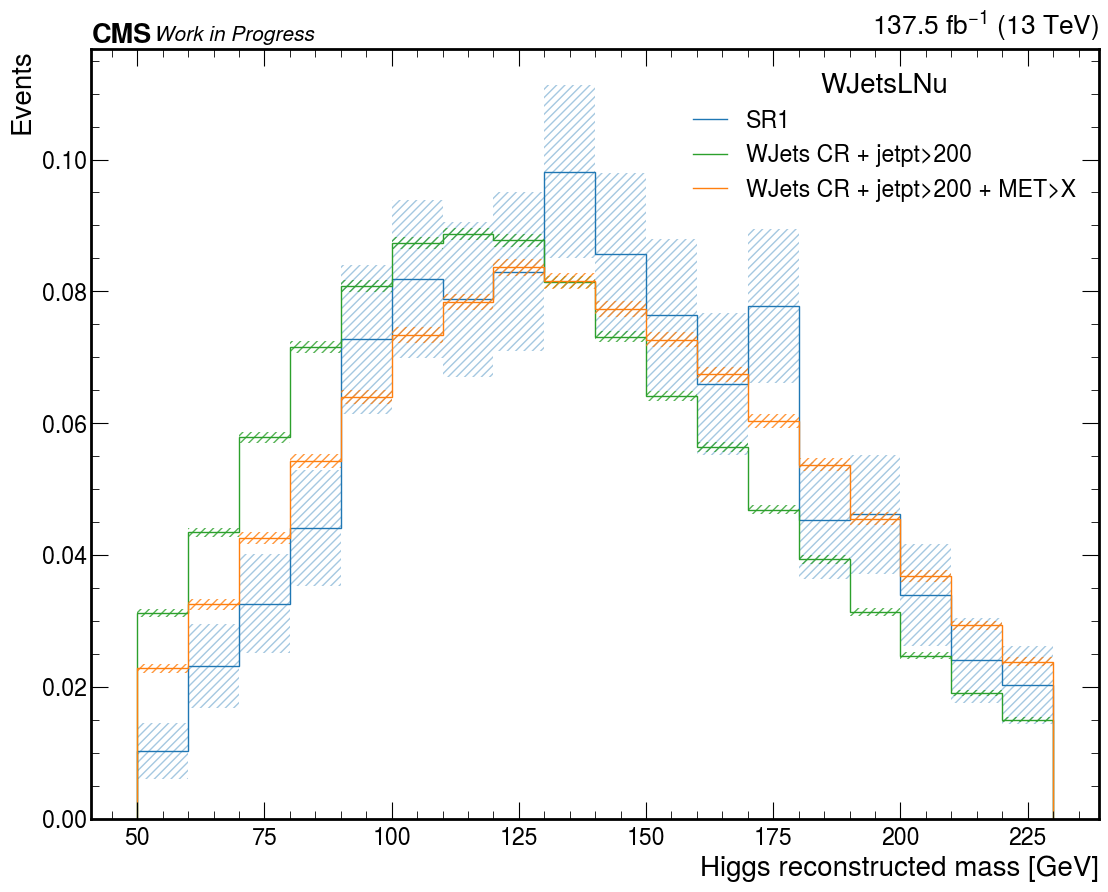

In [243]:
# different regions
fig, ax = plt.subplots(figsize=(13, 10))
color_region = {
    "SR1": "tab:blue",
    "SR2": "tab:orange",
    "WJets CR": "tab:green",
    "Top CR": "tab:green", 
    
    "WJets CR + jetpt>200": "tab:green",
    "WJets CR + jetpt>250": "tab:orange",
    "WJets CR + jetpt>300": "tab:blue",
    
    "WJets CR + jetpt>200 + MET>X": "tab:orange",
    "WJets CR + jetpt>250 + MET>X": "tab:green",
    "WJets CR + jetpt>300 + MET>X": "tab:red",

}

errps = {
    "SR1": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["SR1"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.4,
    },
    "SR2": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["SR2"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.4,
    },
    "WJets CR": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },   
    "Top CR": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },  
    "WJets CR + jetpt>200": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>200"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },
    "WJets CR + jetpt>250": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>250"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },
    "WJets CR + jetpt>300": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>300"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },   
    "WJets CR + jetpt>200 + MET>X": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>200 + MET>X"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },       
    
    "WJets CR + jetpt>250 + MET>X": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>250 + MET>X"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },       
    
    "WJets CR + jetpt>300 + MET>X": {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region["WJets CR + jetpt>300 + MET>X"],
#         "edgecolor": (0, 0, 0, 0.5),
        "linewidth": 0,
        "alpha": 0.8,
    },       
        
    
}

if False:
    bkg = h[{"region": ["SR1", "SR2"]}].project("var")
    bkg2 = bkg.values()/bkg.values().sum()
    hep.histplot(
    #         bkg,
        bkg2,
        bins=bkg.axes[0].edges,        
        ax=ax,
    #         density=True,
        linewidth=1,
        label="Signal Region (SR1+SR2)",
        flow="none",
    )

    ax.stairs(
        values=(bkg + np.sqrt(bkg))/bkg.values().sum(),
        baseline=(bkg - np.sqrt(bkg))/bkg.values().sum(),
        edges=bkg.axes[0].edges,
        **errps["SR1"],        
        label="Stat. unc.",
    )    
    
for region in presel:
    if "SR2" in region:
        continue

    bkg = h[{"region": region}].project("var")    
    
    bkg2 = bkg.values()/bkg.values().sum()
    hep.histplot(
#         bkg,
        bkg2,
        bins=bkg.axes[0].edges,        
        ax=ax,
#         density=True,
        linewidth=1,
        label=region,
        flow="none",
        color=color_region[region]
    )
    
    ax.stairs(
        values=(bkg + np.sqrt(bkg))/bkg.values().sum(),
        baseline=(bkg - np.sqrt(bkg))/bkg.values().sum(),
        edges=bkg.axes[0].edges,
        **errps[region],        
#         label="Stat. unc.",
    )
    


ax.set_xlabel(bkg.axes.label[0])
ax.legend(title=" + ".join(sample for sample in samples), loc="upper right")
ax.set_ylabel("Events")
# ax.set_ylim(0, 0.015)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/z.pdf")     

In [550]:
tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

presel = {    
    
    
#     "Pre-selection + jetpt>200": f"{tagger}>0.5",    
    "Pre-selection + jetpt>250": f"{tagger}>0.5 & fj_pt>250",  
#     "Pre-selection + jetpt>300": f"{tagger}>0.5 & fj_pt>300",
        
    
#     "SR1": f"({tagger}>0.98) & (n_bjets_T==0)",
#     "SR2": f"({tagger}<0.98) & ({tagger}>0.97) & (n_bjets_T==0)",
#     "WJets CR": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0)",
    
#     "WJets CR + jetpt>200": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200",   
#     "WJets CR + jetpt>250": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
      
#     "WJets CR + jetpt>200 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200", 
#     "WJets CR + jetpt>250 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
    
#     "Top CR": f"({tagger}>0.50) & (n_bjets_T>=0)",      
    

}

channels = ["ele", "mu"]
channels = ["ele"]
years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
var = "met_pt"

# samples = ["ggF", "VBF", "VH", "ttH"]
samples = ["ggF", "QCD"]
# samples = ["WJetsLNu", "DYJets"]

# samples = ["WJetsLNu"]
# samples = ["TTbar"]

h = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),        
    hist2.axis.StrCategory([], name="region", growth=True),    
#     hist2.axis.Variable(list(range(50, 240, 10)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    hist2.axis.Regular(30, 0, 250, name="var", label=r"MET", overflow=True),
    
)
ev = events_dict["new_corrections"]

num, den = 0, 0
threshold = 0
for region, sel in presel.items():

    for year in years:
        for ch in channels:   
            for sample in samples:

                df = ev[year][ch][sample]

                df = df.query(sel)    

#                 if (sample == "DYJets"):
#                     threshold = 50
#                     den += len(df['event_weight'])
#                     num += sum(df["event_weight"]>threshold)

#                     df = df[df["event_weight"] < threshold]
                    
                h.fill(
                    samples=sample,
                    region=region,
                    var=df[var],
                    weight=df["event_weight"],
                )     
try:
    print(f"Removing {num} out of {den} DYJets events by applying event_weight<{threshold} ({(100*num/den):.2f}%)")
except:
    z=1                             

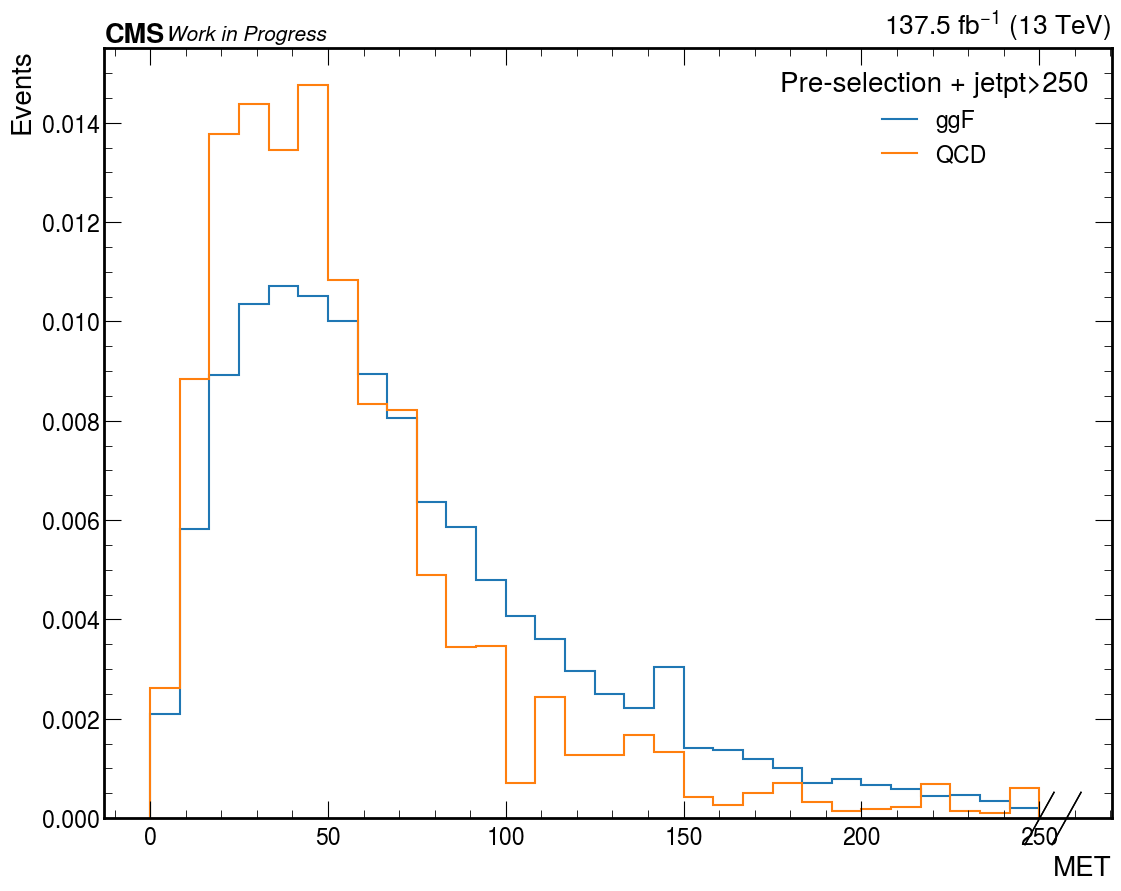

In [553]:
region = "Pre-selection + jetpt>250"
# region = "SR1"

# different regions
fig, ax = plt.subplots(figsize=(13, 10))
for sample in samples:
    hep.histplot(h[{"region": region, "samples": sample}].project("var"),
        label=sample,
        density=True,
#         yerr=True,
    )
ax.legend(title=region, loc="upper right")
ax.set_ylabel("Events")
ax.set_ylim(0)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/z.pdf")     

In [655]:
tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

presel = {    
    
    
    "Pre-selection + jetpt>200": f"{tagger}>0.5",    
    "Pre-selection + jetpt>250": f"{tagger}>0.5 & fj_pt>250",  
    "Pre-selection + jetpt>300": f"{tagger}>0.5 & fj_pt>300",
        
    
#     "SR1": f"({tagger}>0.98) & (n_bjets_T==0)",
#     "SR2": f"({tagger}<0.98) & ({tagger}>0.97) & (n_bjets_T==0)",
#     "WJets CR": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0)",
    
#     "WJets CR + jetpt>200": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200",   
#     "WJets CR + jetpt>250": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
      
#     "WJets CR + jetpt>200 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200", 
#     "WJets CR + jetpt>250 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
    
#     "Top CR": f"({tagger}>0.50) & (n_bjets_T>=0)",      
    

}


years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
var = "met_pt"

samples = ["ggF", "VBF", "VH", "ttH"]
# samples = ["QCD"]
# samples = ["WJetsLNu"]
# samples = ["TTbar"]

h = hist2.Hist(
    hist2.axis.StrCategory([], name="channels", growth=True),        
    hist2.axis.StrCategory([], name="region", growth=True),    
#     hist2.axis.Variable(list(range(50, 240, 10)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    hist2.axis.Regular(30, 0, 250, name="var", label=r"MET", overflow=True),
    
)
ev = events_dict["new_corrections200"]
channels = ["ele", "mu"]

num, den = 0, 0
threshold = 0
for region, sel in presel.items():

    for year in years:
        for ch in channels:   
            for sample in samples:

                df = ev[year][ch][sample]

                df = df.query(sel)    

#                 if (sample == "QCD"):
#                     threshold = 200
#                     den += len(df['event_weight'])
#                     num += sum(df["event_weight"]>threshold)

#                     df = df[df["event_weight"] < threshold]
                    
                h.fill(
                    channels=ch,
                    region=region,
                    var=df[var],
                    weight=df["event_weight"],
                )     
try:
    print(f"Removing {num} out of {den} qcd events by applying event_weight<{threshold} ({(100*num/den):.2f}%)")
except:
    z=1                             

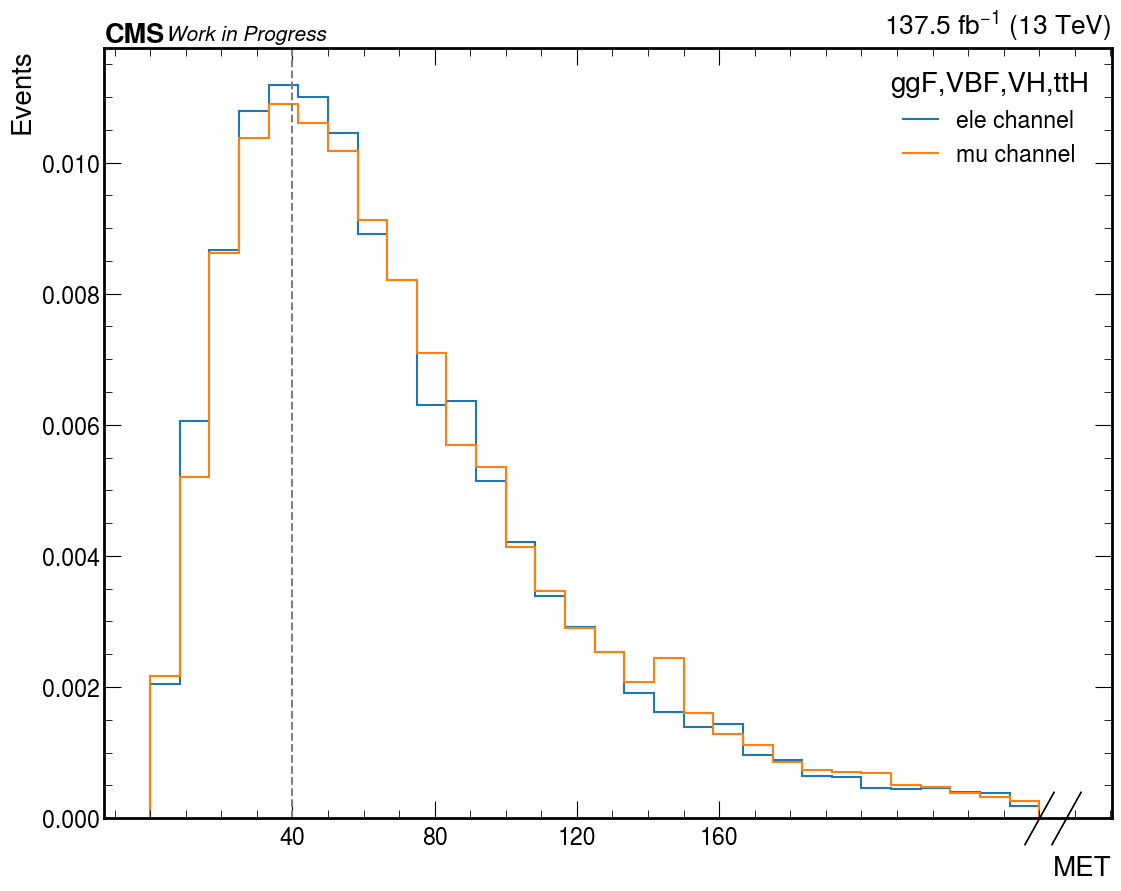

In [656]:
region = "Pre-selection + jetpt>200"
# region = "SR1"

# different regions
fig, ax = plt.subplots(figsize=(13, 10))
for ch in channels:
    hep.histplot(h[{"region": region, "channels": ch}].project("var"),
        label=ch + " channel",
        density=True,
#         yerr=True,
    )
ax.legend(title=",".join(samples), loc="upper right")
ax.set_ylabel("Events")
ax.set_ylim(0)
# ax.set_yscale("log")
ax.axvline(x=40, linestyle="--", color="grey")

ax.set_xticks([40, 80, 120, 160])
lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/z.pdf")     

# WJetsLNu corrections

In [646]:
tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

presel = {    
    
    "Pre-selection": f"{tagger}>0.5",    
    
#     "SR1": f"({tagger}>0.98) & (n_bjets_T==0)",
#     "SR2": f"({tagger}<0.98) & ({tagger}>0.97) & (n_bjets_T==0)",
#     "WJets CR": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0)",
    
#     "WJets CR + jetpt>200": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200",   
#     "WJets CR + jetpt>250": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
      
#     "WJets CR + jetpt>200 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>200", 
#     "WJets CR + jetpt>250 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>250", 
#     "WJets CR + jetpt>300 + MET>X": f"({tagger}<0.97) & ({tagger}>0.50) & (n_bjets_T==0) & fj_pt>300", 
    
#     "Top CR": f"({tagger}>0.50) & (n_bjets_T>=0)",      
    

}

channels = ["ele", "mu"]
channels = ["ele"]
years = ["2018", "2017", "2016", "2016APV"]

# var = "rec_higgs_m"
var = "fj_pt"
# var = "event_weight"
if var=="rec_higgs_m":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="corr", growth=True),
        hist2.axis.Variable(list(range(50, 240, 20)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    )  
elif var == "fj_pt":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="corr", growth=True),
        hist2.axis.Variable(list(range(200, 800, 30)), name="var", label=r"Jet $p_T$ [GeV]", overflow=True)
    )  
    
for region, sel in presel.items():

    for year in years:
        for ch in channels:   
            for corr_ in ["old_corrections", "new_corrections"]:

                df = events_dict[corr_][year][ch]["WJetsLNu"]

                df = df.query(sel)    

                h.fill(
                    corr=corr_,
                    var=df[var],
                    weight=df["event_weight"],
                )

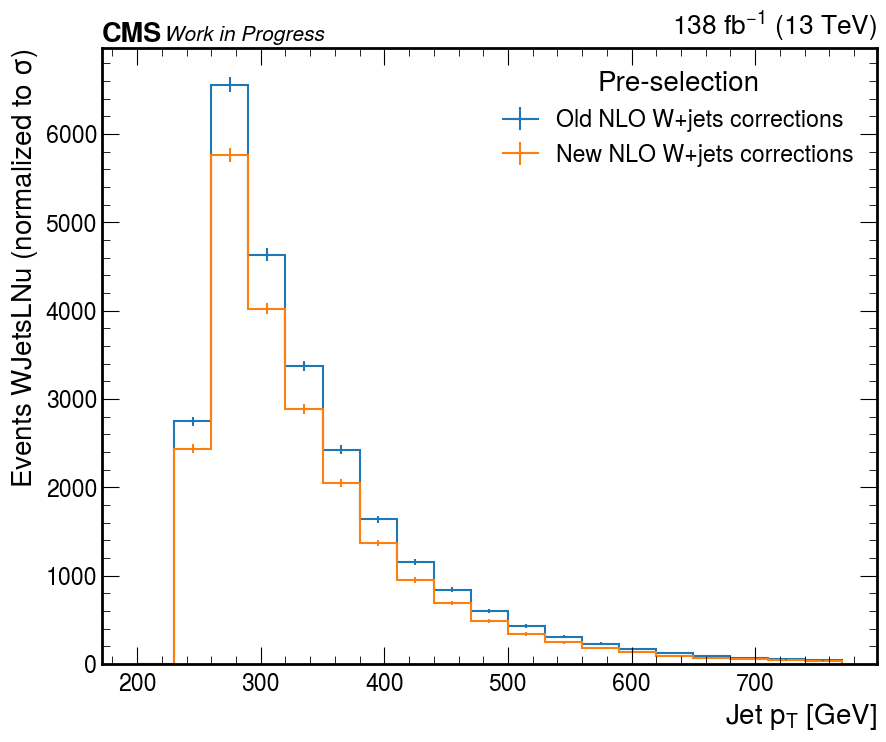

In [661]:
# different corrections

lab_dict = {
    "old_corrections": r"Old NLO W+jets corrections",
    "new_corrections": r"New NLO W+jets corrections",
}

fig, ax = plt.subplots(figsize=(10, 8))
for corr in ["old_corrections", "new_corrections"]:
    hep.histplot(h[{"corr": corr}].project("var"),
        label=lab_dict[corr],
        density=False,
        yerr=True,
        flow=None,
    )
ax.legend(title=region, loc="upper right")
ax.set_ylabel(r"Events WJetsLNu (normalized to $\sigma$)")
# ax.set_ylim(0, 0.013)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.0f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN/wjetscorr.pdf")     

In [161]:
samples_to_plot = [
    'WJetsToLNu_HT-70To100',
    'WJetsToLNu_HT-100To200',
    'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-2500ToInf',    
]

In [181]:
tagger = "fj_ParT_score_finetuned"
presel = {
#     "Pre-selection": f"fj_pt>0",       

    "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20)",
}

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
hists = {}

# var = "rec_higgs_m"
var = "fj_pt"
# var = "event_weight"
if var=="rec_higgs_m":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(50, 240, 20)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    )  
elif var == "fj_pt":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(200, 800, 30)), name="var", label=r"Jet $p_T$ [GeV]", overflow=True)
    )      

corr = "new_corrections_wjets"
ev = events_dict[corr]

for sample in samples_to_plot:
    for year in years:
        for ch in channels:

            region, sel = list(presel.items())[0]

            try:
                df = ev[year][ch][sample]
                df = df.query(sel)
                if "MET>X" in region:
                    if ch=="ele":
                        df = df[df["met_pt"]>70]
                    else:
                        df = df[df["met_pt"]>50]
                x = df[var]                            
                if len(x)==0:
                    x = 0   
                w = df["event_weight"]
                
            except:
                print(f"{sample} does not exist in {corr}")
                x = 0
                w = 0
                
            h.fill(
                samples=sample, var=x, weight=w,
            )

WJetsToLNu_HT-70To100 does not exist in new_corrections_wjets
WJetsToLNu_HT-70To100 does not exist in new_corrections_wjets
WJetsToLNu_HT-70To100 does not exist in new_corrections_wjets


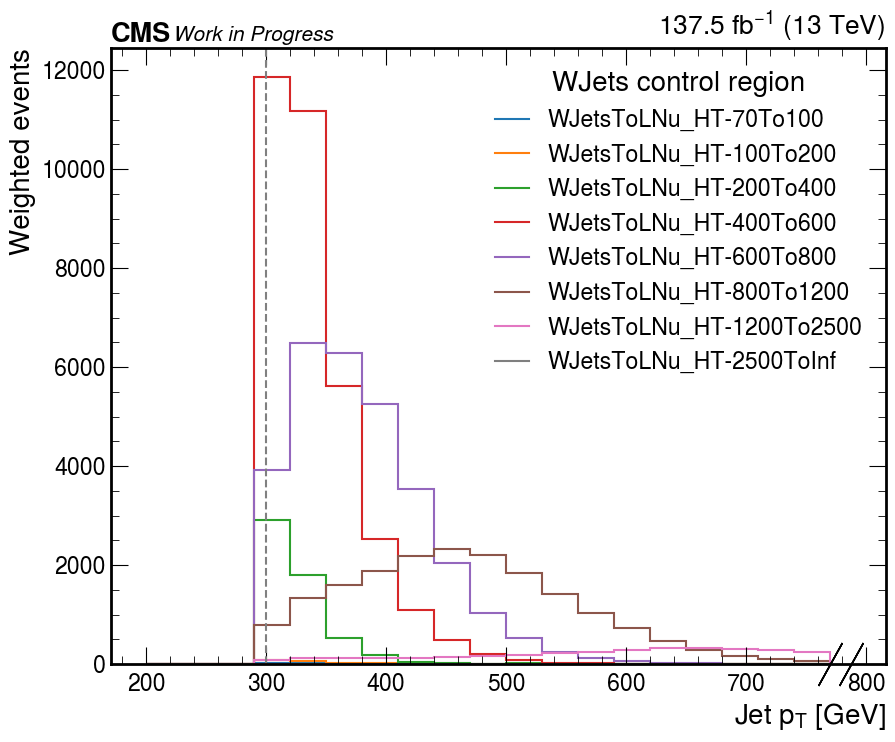

In [182]:
fig, ax = plt.subplots(figsize=(10, 8))
for sample in samples_to_plot:
    hep.histplot(h[{"samples": sample}].project("var"),
        label=sample,
#         density=True,
#         yerr=False,
    )
ax.axvline(300, linestyle="--", color="grey")
ax.legend(title=region, loc="upper right")
ax.set_ylabel("Weighted events")
# ax.set_ylim(0.01, 10e4)
# ax.set_ylim(0, 2500)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku5/wjetscorr.pdf")     

# High qcd weights

In [1855]:
samples_to_plot = list(events_dictqcd["signal_region"]["2017"]["ele"].keys())
samples_to_plot

['QCD_Pt_3200toInf',
 'QCD_Pt_1800to2400',
 'QCD_Pt_2400to3200',
 'QCD_Pt_1000to1400',
 'QCD_Pt_600to800',
 'QCD_Pt_300to470',
 'QCD_Pt_170to300',
 'QCD_Pt_800to1000',
 'QCD_Pt_470to600',
 'QCD_Pt_1400to1800']

In [1856]:
tagger = "fj_ParT_score_finetuned"
presel = {
    "Pre-selection": f"fj_pt>0",       

#     "High purity signal region": f"({tagger}>0.97)",
#     "High purity signal region + MET>X": f"({tagger}>0.97)",
    
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
#     "Medium purity signal region + MET>X": f"({tagger}<0.97) & ({tagger}>0.85)",
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
#     "WJets control region + MET>X": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
    
}

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
hists = {}

# var = "rec_higgs_m"
var = "fj_pt"
# var = "event_weight"
if var=="rec_higgs_m":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(50, 240, 20)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    )  
elif var == "fj_pt":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(200, 800, 30)), name="var", label=r"Jet $p_T$ [GeV]", overflow=True)
    )      
else:
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(0, 500, 20)), name="var", label=r"Event weight", overflow=True)
    )      

for sample in samples_to_plot:
    for year in years:
        for ch in channels:

            region, sel = list(presel.items())[0]

            df = events_dictqcd["signal_region"][year][ch][sample]
            df = df.query(sel)

            if "MET>X" in region:
                if ch=="ele":
                    df = df[df["met_pt"]>70]
                else:
                    df = df[df["met_pt"]>50]

            x = df[var]
            if len(x)==0:
                x = 0   
                
            if var=="event_weight":
                h.fill(
                    samples=sample, var=x,
                )

            else:
                h.fill(
                    samples=sample, var=x, weight=df["event_weight"],
                )

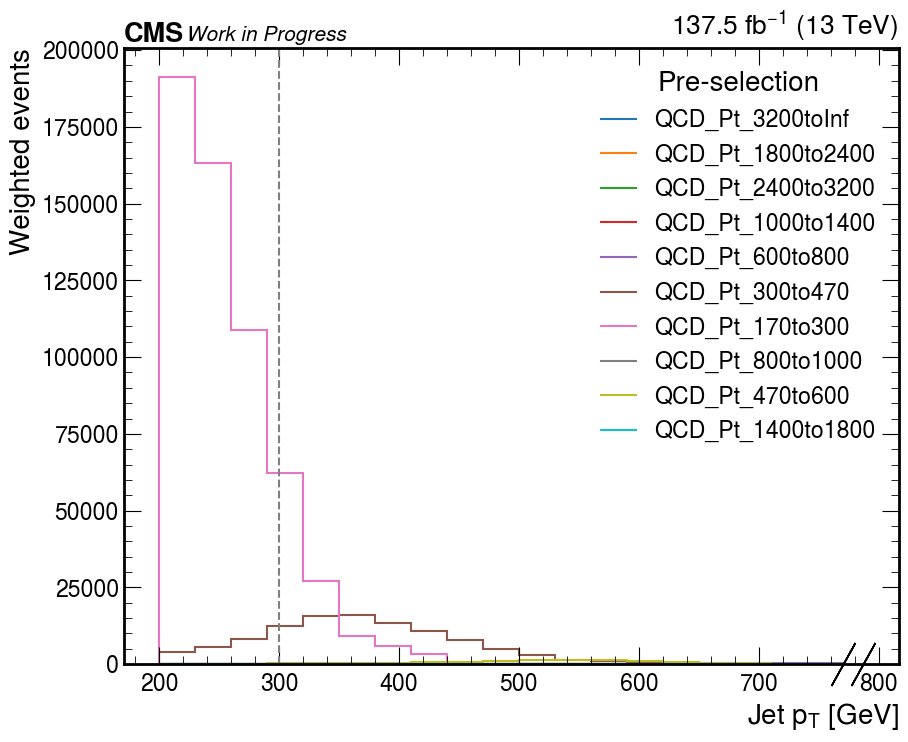

In [1857]:
fig, ax = plt.subplots(figsize=(10, 8))
for sample in samples_to_plot:
    hep.histplot(h[{"samples": sample}].project("var"),
        label=sample,
#         density=True,
#         yerr=False,
    )
ax.axvline(300, linestyle="--", color="grey")
ax.legend(title=region, loc="upper right")
ax.set_ylabel("Weighted events")
# ax.set_ylim(0.01, 10e4)
# ax.set_ylim(0, 2500)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku5/qcd_high_weights_wjets_jetpt.pdf")     

# soverb

In [149]:
dominant_backgrounds = ["WJetsLNu", "TTbar", "QCD", "DYJets"]

In [150]:
samples

['ggF',
 'VH',
 'VBF',
 'ttH',
 'QCD',
 'DYJets',
 'WJetsLNu',
 'WZQQ',
 'TTbar',
 'SingleTop',
 'Diboson',
 'Data']

In [333]:
# tagger = "ParT_finetuned"
tagger = "fj_ParT_score_finetuned"

presel = {
#     "High purity signal region": f"({tagger}>0.97)",
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)", 
    "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20)", 

#     "WJets control region + dR>0.2": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0) & (lep_fj_dr>0.2)",    

#     "Top control region": f"({tagger}<0.2) & (n_bjets_T>0)",  
#     "Top control region + dR>0.1": f"({tagger}<0.20) & (n_bjets_T>0) & (lep_fj_dr>0.1)",      

#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
#     "Lep iso": f"fj_pt>0",
}

categories_sel = {
#     "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
#     "ggF_pt200to300": "( (mjj<1000) | (deta<3.5) ) & (fj_pt<300)",    
#     "ggF_pt300toinf": "( (mjj<1000) | (deta<3.5) ) & (fj_pt>300)",
    
}

mass_window = [80, 160]

years = ["2018", "2017", "2016APV", "2016"]
channels = ["ele", "mu"]

num_sig = {
    "ggF": 0, 
    "ttH": 0, 
    "VH": 0,
    "VBF": 0,
}
num_bkg = {
    "WJetsLNu": 0, 
    "TTbar": 0, 
    "QCD": 0,
    "DYJets": 0,
    "Others": 0,
}

deno_sig, deno_bkg = 0, 0
s, b = 0, 0

for year in years:
    for ch in channels:
        for sample in samples:
            if sample=="Data":
                continue

            for k, v in presel.items():
                if "QCD" in k:
                    df = events_dict["qcd_region"][year][ch][sample]
                else:
                    df = events_dict["signal_region"][year][ch][sample]

                df = df.query(v)  
                
#                 if "High" in k:
#                     if sample == "QCD":
#                         df = df[df["event_weight"]<140]
#                 if "Medium" in k:
#                     if sample == "QCD":
#                         df = df[df["event_weight"]<200]
            
#             for category, category_sel in categories_sel.items():
#                 df = df.query(category_sel)            
            
#             if sample == "QCD":
#                 df = df[df["event_weight"]<50]
                
#             if ch=="ele":
#                 df = df[df["met_pt"]>70]
#             else:
#                 df = df[df["met_pt"]>50]
                
#             df = df[df["n_bjets_L"]==0]
#             df = df[df["lep_fj_dr"]>0.2]
            df = df[df["lep_met_mt"]>40]
    
#             df = df[(df["fj_pt"]/df["lep_pt"])<3]

#             df = df[np.abs(df["met_fj_dphi"])<2.5]

#             df = df[df["fj_ParT_mass"]<50]

#             df = df[df["fj_pt"]>250]
            ######################## composition start
            if sample in utils.signals:
                
                deno_sig += df["event_weight"].sum()
                num_sig[sample] += df["event_weight"].sum()
            else:
                deno_bkg += df["event_weight"].sum()
                
                if sample in dominant_backgrounds:
                    num_bkg[sample] += df["event_weight"].sum()
                else:
                    num_bkg["Others"] += df["event_weight"].sum()     
            ######################## composition end
            
            ######################## soverb start
            df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]
    
            if sample in utils.signals:                
                s += df["event_weight"].sum()
            else:
                b += df["event_weight"].sum()
            ######################## soverb end

In [334]:
num_sig = dict(sorted(num_sig.items(), key=lambda item: item[1]))
num_bkg = dict(sorted(num_bkg.items(), key=lambda item: item[1]))

if len(years) == 4:
    lab = "Run2"
else:
    lab = "_".join(years)

print("\033[1m" + f"{list(presel.keys())[0]} ({lab}):" + '\033[0m')
# print("Category:", category)

print("------------------------")

if "purity" in list(presel.keys())[0]:
    print("\033[1m" + rf"s/sqrt(b) in [{mass_window[0]},{mass_window[1]}]: {s/math.sqrt(b):.2f}" + '\033[0m')
    print("------------------------")

print(f"Signal: {deno_sig:.2f}")
for sample in num_sig:
    print(f"- {sample}: {100*(num_sig[sample]/deno_sig):.0f}%")
    
print("------------------------")
print(f"Background: {deno_bkg:.2f}")
for sample in num_bkg:
    if sample=="":
        print("\033[1m" + f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%")
    else:
        print(f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%") 

WJets control region (Run2):
------------------------
Signal: 475.17
- ttH: 16%
- VH: 17%
- VBF: 20%
- ggF: 47%
------------------------
Background: 497404.16
- Others: 2%
- QCD: 5%
- DYJets: 15%
- TTbar: 18%
- WJetsLNu: 59%


In [587]:
(0.74**2 + 0.81**2 + 0.59**2)**0.5   # VBF / ggF200-300 / ggF300-450 / ggF450-inf

1.2457126474432216

# WJetsLNu region

In [455]:
tagger = "fj_ParT_score_finetuned_v2_nor2"

# mass_window = [50, 200]

years = ["2018", "2017"]
# years = ["2017"]
channels = ["ele", "mu"]

num_sig = {
    "ggF": 0, 
    "ttH": 0, 
    "VH": 0,
    "VBF": 0,
}
num_bkg = {
    "WJetsLNu": 0, 
    "TTbar": 0, 
    "QCD": 0,
    "Others": 0,
}
deno_sig, deno_bkg = 0, 0

# tagger_cuts = [0.01, 0.02, 0.03, 0.04, 0.07, 0.09, 0.1, 0.2, 0.8]
# tagger_cuts = np.linspace(0.01, 0.8, 21)
tagger_cuts = np.linspace(0.01, 0.3, 21)
ttt = []
for tagger_cut in tagger_cuts:
    for year in years:
        for ch in channels:
            for sample in samples:
                if sample=="Data":
                    continue

                df = events_dict[year][ch][sample]

    #             df = df[(df["rec_higgs_m"]>mass_window[0]) & (df["rec_higgs_m"]<mass_window[1])]

                df = df[df["event_weight"]<140]
                df = df[df[tagger]<0.85]
                df = df[df[tagger]>tagger_cut]
                df = df[df["n_bjets_L"]==0]                


                if sample in utils.signals:
                    deno_sig += df["event_weight"].sum()
                    num_sig[sample] += df["event_weight"].sum()
                else:
                    deno_bkg += df["event_weight"].sum()
                    if sample in dominant_backgrounds:
                        num_bkg[sample] += df["event_weight"].sum()
                    else:
                        num_bkg["Others"] += df["event_weight"].sum()
                        
    ttt.append(100*(num_bkg["WJetsLNu"]/deno_bkg))  

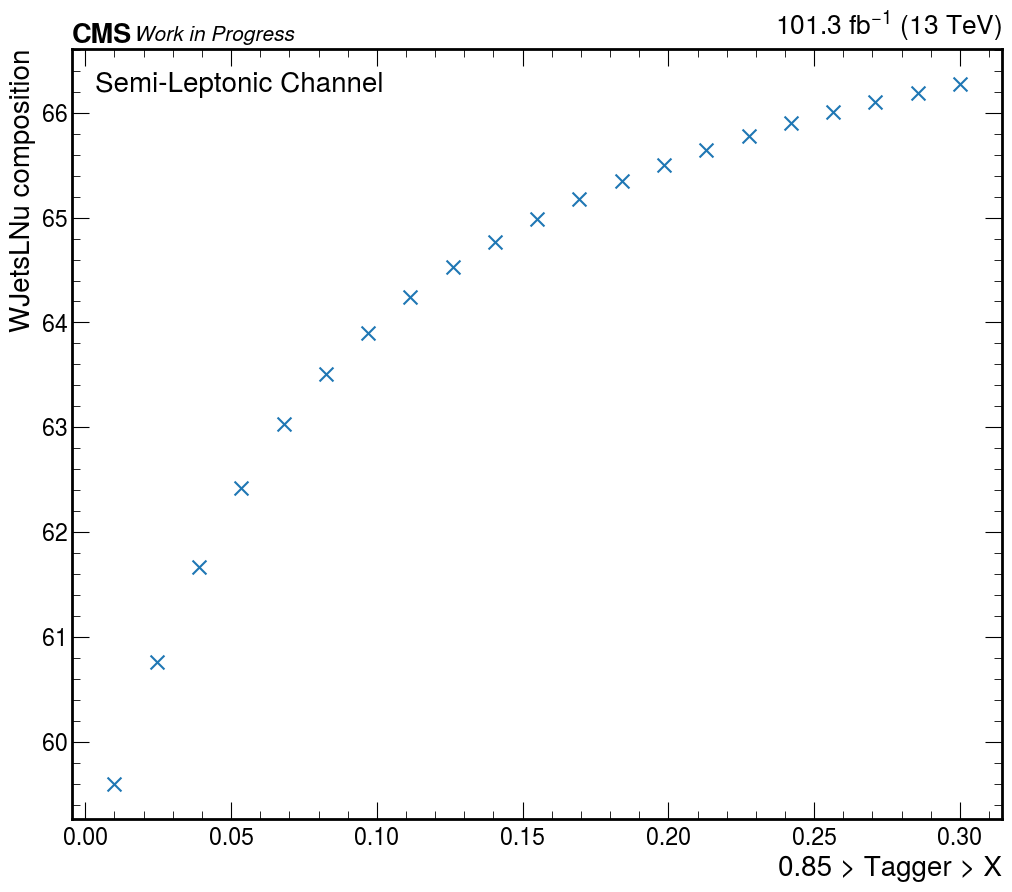

In [456]:
years = ["2018", "2017"]
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(tagger_cuts, ttt, marker="x", s=100)

# ax.axvline(0.85, color="grey", linestyle="--")#, label=rf"125 GeV")

# ax.set_ylim(0, 1.4)
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel(r"WJetsLNu composition");
ax.set_xlabel(r"0.85 > Tagger > X")
# ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
# ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])

lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/soverb_W_region4.pdf")  

# Sculpting

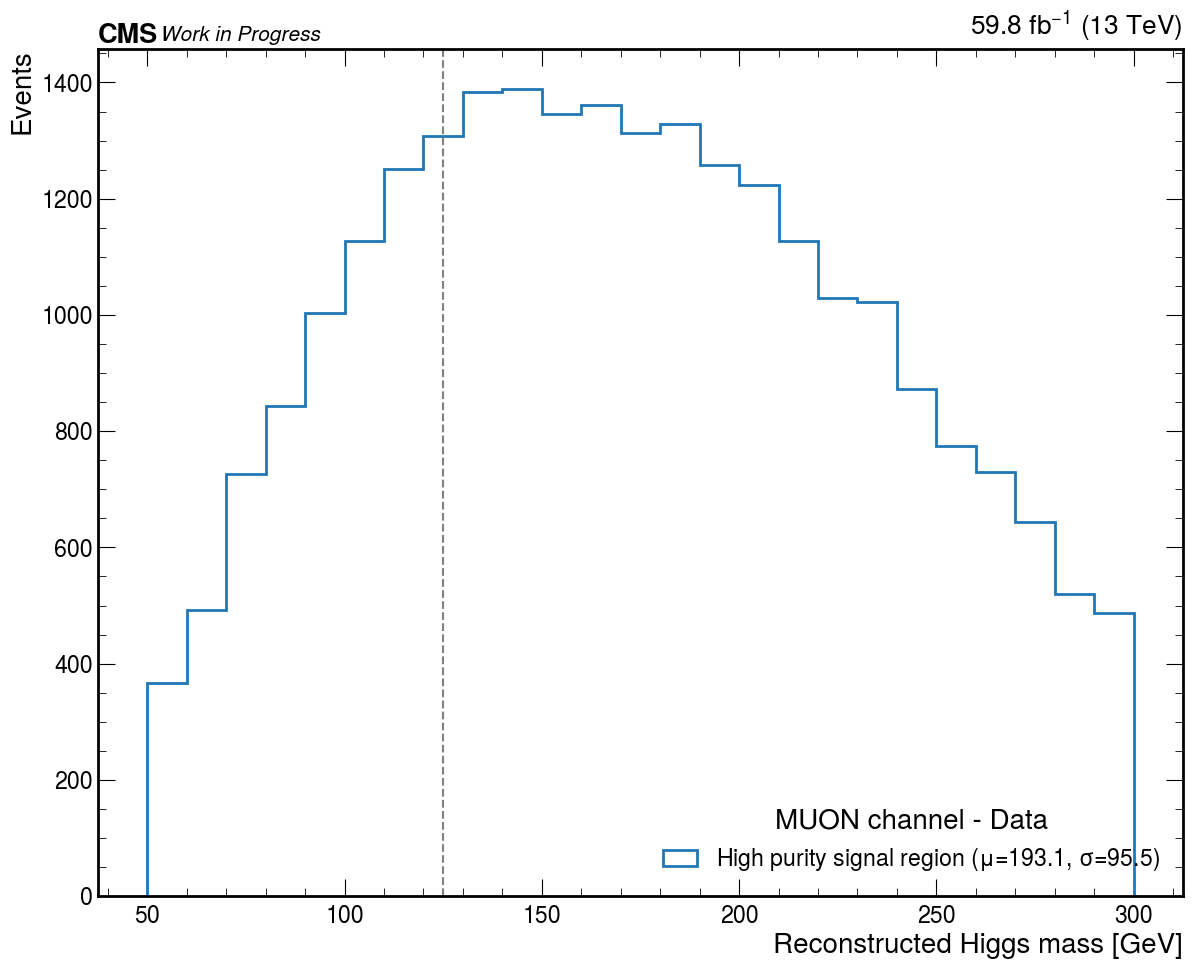

In [531]:
plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score_finetuned_v2_10_12"
tagger = "fj_ParT_score"
# tagger = "fj_ParT_score_finetuned"
presel = {
    "High purity signal region": f"({tagger}>0.97)",
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  

#     "Top control region + dR>0.1": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.1)",
#     "Top control region + dR>0.2": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.2)",
#     "Top control region + dR>0.3": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.3)",
#     "Top control region + dR>0.4": f"({tagger}<0.9) & (n_bjets_T>0) & (lep_fj_dr>0.4)",
    
#     "WJets control region": f"({tagger}<0.80) & ({tagger}>0.20) & (n_bjets_L==0)",

#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
    
#     "ParT-finetuned>0.97": f"(fj_ParT_score_finetuned_v2_nor2>0.97)",
#     "ParT>0.99": f"(fj_ParT_score>0.99)"
    
    
}

nice_ch = {
    "ele": "ELECTRON",
    "mu": "MUON",
}

sample = "Data"
channels = ["mu"]#, "ele"]
years = ["2018"]#, "2017"]

fig, ax = plt.subplots(figsize=(14, 11))
for k, v in presel.items():
    
    for year in years:

        if "QCD" in k:
            region="qcd_region"
        else:
            region="signal_region"

        df1 = events_dict[region][year]["mu"][sample]    
        df2 = events_dict[region][year]["ele"][sample]

        df = pd.concat([df1, df2])

        if len(years) > 1:
            df1 = events_dict[region][years[1]]["mu"][sample]    
            df2 = events_dict[region][years[1]]["ele"][sample]

            df11 = pd.concat([df1, df2])

            df = pd.concat([df, df11])
            break
            
    bins = 26

    df1 = df.copy().query(v)

    x = df1["rec_higgs_m"]
#     w = df1["event_weight"]

    ax.hist(
        x, 
        bins=np.linspace(50,300,bins), 
#         weights=w,
#         density=True, 
        histtype="step", 
        linewidth=2, 
        label=rf"{k} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
    )

ax.axvline(125, color="grey", linestyle="--")#, label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0)

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/mass_sculpting_{sample}.pdf")        

In [514]:
all_files = glob.glob("ttt/*")
log_files = glob.glob("ttt/log*")

In [505]:
all_files

['ttt/t', 'ttt/log.txt', 'ttt/a.txt']

In [506]:
log_files

['ttt/log.txt']

# Data

In [803]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [804]:
################### option 2
def blindBins(h, blind_region, blind_samples=[]):
    """
    Blind (i.e. zero) bins in histogram ``h``.
    If ``blind_samples`` specified, only blind those samples, else blinds all.

    CAREFUL: assumes axis=0 is samples, axis=3 is mass_axis

    """

    h = h.copy()

    massbins = h.axes["mass_observable"].edges

    lv = int(np.searchsorted(massbins, blind_region[0], "right"))
    rv = int(np.searchsorted(massbins, blind_region[1], "left") + 1)

    if blind_samples:
        for blind_sample in blind_samples:
            sample_index = np.argmax(np.array(list(h.axes[0])) == blind_sample)
            h.view(flow=True)[sample_index, :, :, lv:rv] = 0

    else:
        h.view(flow=True)[:, :, :, lv:rv] = 0

    return h

plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

regions_sel = {
#     "Pre-selection": f"{tagger}>0.5",    
    "SR1 (tagger>0.97 + nbjetsT==0)": f"({tagger}>0.97) & (n_bjets_T==0)",
#     "SR2 (0.97>tagger>0.85 + nbjetsT==0)": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_T==0)",
#     "WJets CR (0.85>tagger>0.50 + nbjetsT==0)": f"({tagger}<0.85) & ({tagger}>0.50) & (n_bjets_T==0)",    
#     "Top CR (tagger>0.85 + nbjetsT>0)": f"({tagger}>0.85) & (n_bjets_T>0)", 
    
}

categories_sel = {
    "VBF category": "(mjj>1000) & (deta>3.5)",
#     rf"ggF category ($p_T$ $\in$ [200, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>200) & (fj_pt<450)",
    rf"ggF category ($p_T$ $\in$ [300, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>300)",
}

samples = ["Data", "ggF", "VBF"]
channels = ["ele", "mu"]
# channels = ["mu"]
blind = True
blind_region = (90, 160)

years = ["2018", "2017", "2016", "2016APV"]
lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0
    

# fill histograms
hists = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),            
    hist2.axis.StrCategory([], name="regions", growth=True),
    hist2.axis.StrCategory([], name="categories", growth=True),    
    hist2.axis.Variable(
        list(range(50, 240, 20)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
    ),
)        

mult = {
    "SR1 (tagger>0.97 + nbjetsT==0)": 10,
#     "SR2 (0.97>tagger>0.85 + nbjetsT==0)": 100,
}

for sample in samples:
    for year in years:
        for ch in channels:
            df = ev[year][ch][sample]
            for region, region_sel in regions_sel.items():
                for category, category_sel in categories_sel.items():
                    df1 = df.copy().query(region_sel)
                    df1 = df1.query(category_sel)

                    if ((sample=="ggF") or (sample=="VBF")):
                        df1["event_weight"]=df1["event_weight"]*mult[region]

                    hists.fill(
                        samples=sample,
                        regions=region,
                        categories=category,
                        mass_observable=df1["rec_higgs_m"],
                        weight=df1["event_weight"],
                    )

INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral


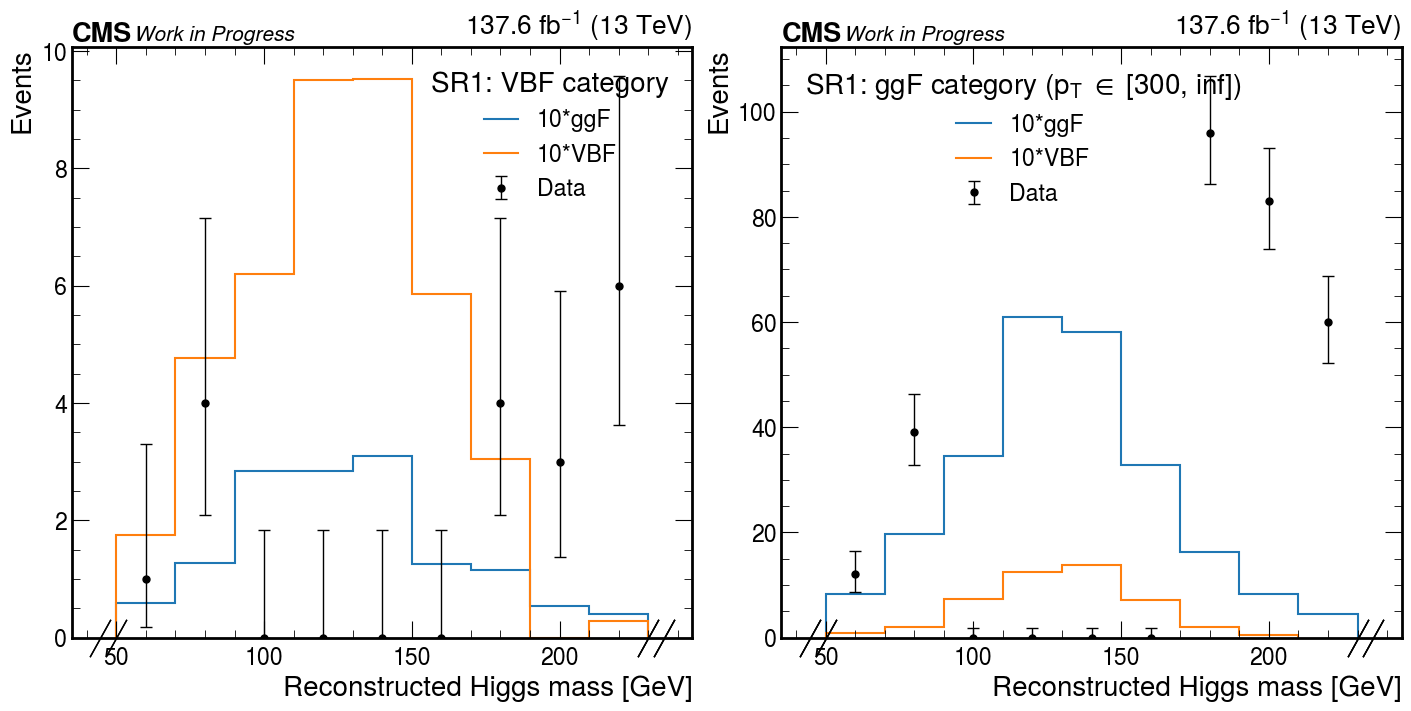

In [805]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), constrained_layout=True)

region = list(regions_sel.items())[0][0]
for i, category in enumerate(categories_sel):
    for sample in samples:
        
        
        if sample == "Data":
            if blind:
                hists = blindBins(hists, (blind_region[0],blind_region[1]), blind_samples=["Data"])
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                label=sample,
                histtype="errorbar",
                color="k",
                capsize=4,           
            )   
            
        else:
            if mult[region]==1:
                lab = sample            
            else:
                lab = f"{mult[region]}*{sample}"
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                histtype="step",
                label=lab,
            )    
                

    axs[i].legend(title=f"SR1: {category}")
    axs[i].set_ylabel(f"Events")
    axs[i].set_xlabel(f"Reconstructed Higgs mass [GeV]")
    axs[i].set_ylim(0)    
    hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=axs[i], fontsize=20)
    hep.cms.text("Work in Progress", ax=axs[i], fontsize=15)
#     if i==2:
#         axs[i].set_yticks([0,4,8,12,16])
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku5/ww3.pdf")

In [1099]:
################### option 2
def blindBins(h, blind_region, blind_samples=[]):
    """
    Blind (i.e. zero) bins in histogram ``h``.
    If ``blind_samples`` specified, only blind those samples, else blinds all.

    CAREFUL: assumes axis=0 is samples, axis=3 is mass_axis

    """

    h = h.copy()

    massbins = h.axes["mass_observable"].edges

    lv = int(np.searchsorted(massbins, blind_region[0], "right"))
    rv = int(np.searchsorted(massbins, blind_region[1], "left") + 1)

    if blind_samples:
        for blind_sample in blind_samples:
            sample_index = np.argmax(np.array(list(h.axes[0])) == blind_sample)
            h.view(flow=True)[sample_index, :, :, lv:rv] = 0

    else:
        h.view(flow=True)[:, :, :, lv:rv] = 0

    return h

plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

regions_sel = {
#     "Pre-selection": f"{tagger}>0.5",    
    "SR1": f"({tagger}>0.98) & (n_bjets_T==0)",
#     "SR2": f"({tagger}>0.97) & ({tagger}<0.98) & (n_bjets_T==0)",

    
#     "SR1 (tagger>0.97 + nbjetsT==0)": f"({tagger}>0.97) & (n_bjets_T==0)",
#     "SR2 (0.97>tagger>0.85 + nbjetsT==0)": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_T==0)",
#     "WJets CR (0.85>tagger>0.50 + nbjetsT==0)": f"({tagger}<0.85) & ({tagger}>0.50) & (n_bjets_T==0)",    
#     "Top CR (tagger>0.85 + nbjetsT>0)": f"({tagger}>0.85) & (n_bjets_T>0)", 
    
}

categories_sel = {
    "VBF category": "(mjj>1000) & (deta>3.5)",
    rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
    rf"ggF category ($p_T$ $\in$ [450, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>450)",
    
#     rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
#     rf"ggF category ($p_T$ $\in$ [450, 650])": "(mjj<1000) & (deta<3.5) & (fj_pt>450) & (fj_pt<650)",
#     rf"ggF category ($p_T$ $\in$ [650, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>650)",        
}

samples = ["Data", "ggF", "VBF"]
channels = ["ele", "mu"]
blind = True
blind_region = (90, 160)

years = ["2018", "2017", "2016", "2016APV"]
lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0
    

# fill histograms
hists = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),            
    hist2.axis.StrCategory([], name="regions", growth=True),
    hist2.axis.StrCategory([], name="categories", growth=True),    
    hist2.axis.Variable(
        list(range(50, 240, 20)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
    ),
)        

mult = {
    "SR1": 10,
    "SR2": 100,
}

for sample in samples:
    for year in years:
        for ch in channels:
            df = ev[year][ch][sample]
            for region, region_sel in regions_sel.items():
                for category, category_sel in categories_sel.items():
                    df1 = df.copy().query(region_sel)
                    df1 = df1.query(category_sel)

                    if ((sample=="ggF") or (sample=="VBF")):
                        df1["event_weight"]=df1["event_weight"]*mult[region]

                    hists.fill(
                        samples=sample,
                        regions=region,
                        categories=category,
                        mass_observable=df1["rec_higgs_m"],
                        weight=df1["event_weight"],
                    )

INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral


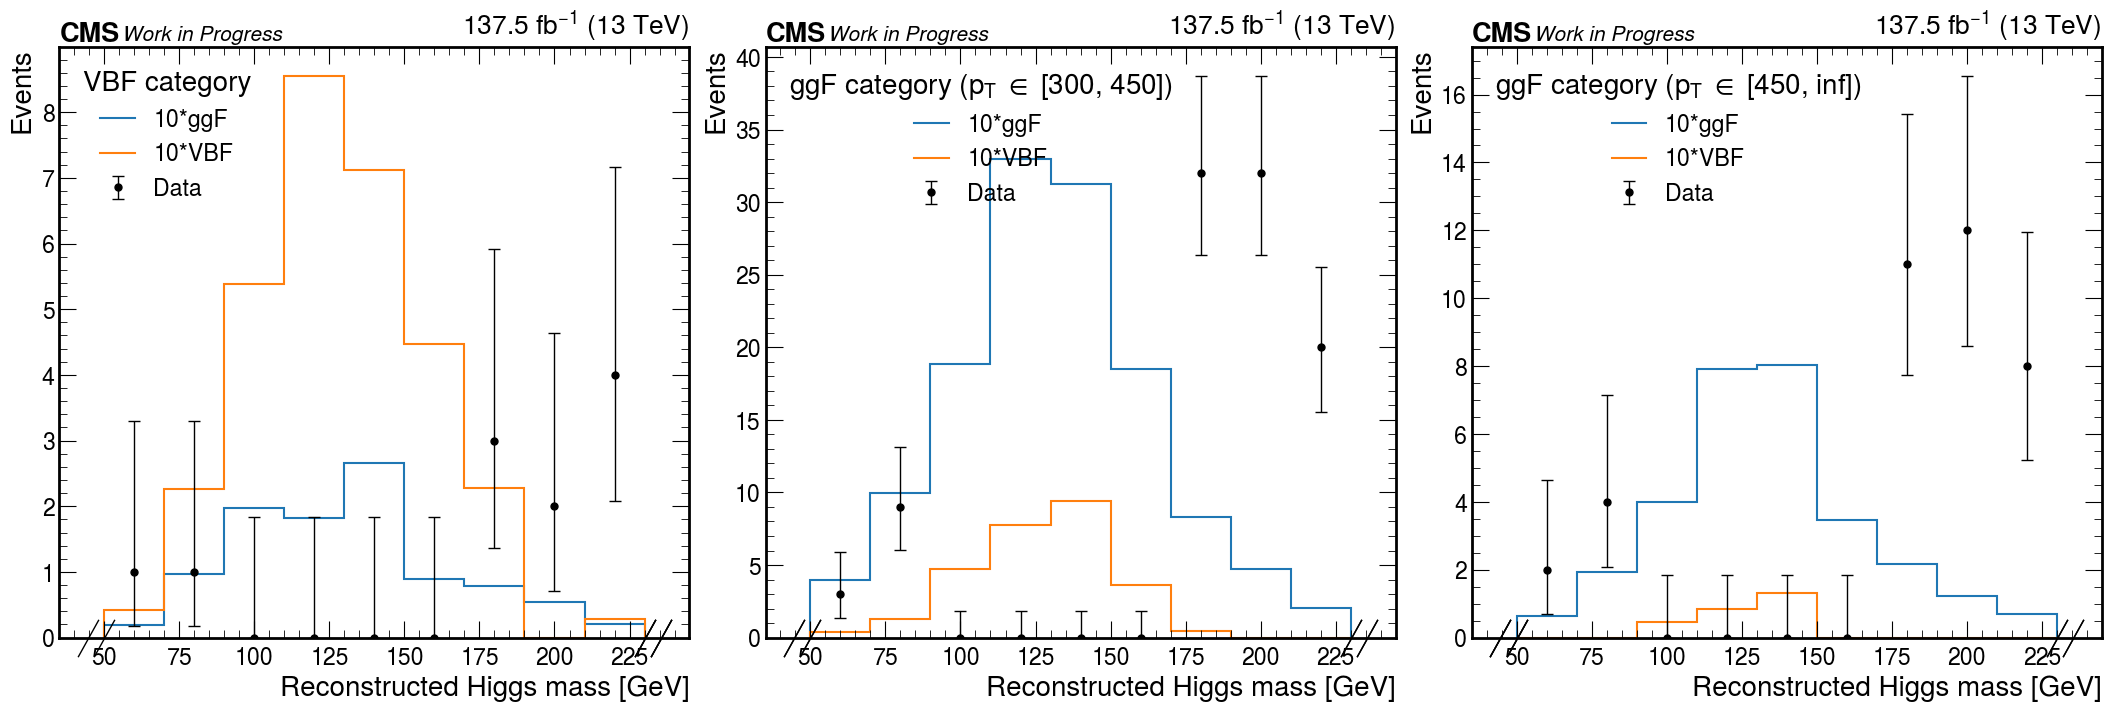

In [1100]:
fig, axs = plt.subplots(1, 3, figsize=(21,7), constrained_layout=True)

region = list(regions_sel.items())[0][0]
for i, category in enumerate(categories_sel):
    for sample in samples:
        
        
        if sample == "Data":
            if blind:
                hists = blindBins(hists, (blind_region[0],blind_region[1]), blind_samples=["Data"])
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                label=sample,
                histtype="errorbar",
                color="k",
                capsize=4,           
            )   
            
        else:
            if mult[region]==1:
                lab = sample            
            else:
                lab = f"{mult[region]}*{sample}"
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                histtype="step",
                label=lab,
            )    
            
    axs[i].legend(title=category)
    axs[i].set_ylabel(f"Events")
    axs[i].set_xlabel(f"Reconstructed Higgs mass [GeV]")
    axs[i].set_ylim(0)    
    hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=axs[i], fontsize=20)
    hep.cms.text("Work in Progress", ax=axs[i], fontsize=15)
#     if i==2:
#         axs[i].set_yticks([0,4,8,12,16])
plt.savefig(f"/Users/fmokhtar/Desktop/AN/ww2.pdf")

In [25]:
################### option 2
def blindBins(h, blind_region, blind_samples=[]):
    """
    Blind (i.e. zero) bins in histogram ``h``.
    If ``blind_samples`` specified, only blind those samples, else blinds all.

    CAREFUL: assumes axis=0 is samples, axis=3 is mass_axis

    """

    h = h.copy()

    massbins = h.axes["mass_observable"].edges

    lv = int(np.searchsorted(massbins, blind_region[0], "right"))
    rv = int(np.searchsorted(massbins, blind_region[1], "left") + 1)

    if blind_samples:
        for blind_sample in blind_samples:
            sample_index = np.argmax(np.array(list(h.axes[0])) == blind_sample)
            h.view(flow=True)[sample_index, :, :, lv:rv] = 0

    else:
        h.view(flow=True)[:, :, :, lv:rv] = 0

    return h

plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

regions_sel = {
#     "Pre-selection": f"{tagger}>0.5",   
    
    "SR1": f"(n_bjets_T==0)",
    
#     "SR1": f" & (n_bjets_T==0)",
#     "SR2": f"({tagger}>0.97) & ({tagger}<0.98) & (n_bjets_T==0)",

    
#     "SR1 (tagger>0.97 + nbjetsT==0)": f"({tagger}>0.97) & (n_bjets_T==0)",
#     "SR2 (0.97>tagger>0.85 + nbjetsT==0)": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_T==0)",
#     "WJets CR (0.85>tagger>0.50 + nbjetsT==0)": f"({tagger}<0.85) & ({tagger}>0.50) & (n_bjets_T==0)",    
#     "Top CR (tagger>0.85 + nbjetsT>0)": f"({tagger}>0.85) & (n_bjets_T>0)", 
    
}

# categories_sel = {
#     "VBF category": "(mjj>1000) & (deta>3.5)",
#     rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
#     rf"ggF category ($p_T$ $\in$ [450, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>450)",
    
# #     rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
# #     rf"ggF category ($p_T$ $\in$ [450, 650])": "(mjj<1000) & (deta<3.5) & (fj_pt>450) & (fj_pt<650)",
# #     rf"ggF category ($p_T$ $\in$ [650, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>650)",        
# }

categories_sel = {
    "SR1": {
        "VBF": f"({tagger}>0.97) & (mjj>1000) & (deta>3.5)",
        rf"ggF $p_T$ $\in$ [250, 300]": f"({tagger}>0.98) & (mjj<1000) & (deta<3.5) & (fj_pt>250) & (fj_pt<300)",        
        rf"ggF $p_T$ $\in$ [300, 450]": f"({tagger}>0.98) & (mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
        rf"ggF $p_T$ $\in$ [450, Inf]": f"({tagger}>0.98) & (mjj<1000) & (deta<3.5) & (fj_pt>450)",
    },
    
    "SR2": {
    rf"all inclusive": "(mjj<1000) & (deta<3.5)",
    }
}
#     "VBF category": "(mjj>1000) & (deta>3.5)",
#     rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
#     rf"ggF category ($p_T$ $\in$ [450, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>450)",
    
#     rf"ggF category ($p_T$ $\in$ [300, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>300) & (fj_pt<450)",
#     rf"ggF category ($p_T$ $\in$ [450, 650])": "(mjj<1000) & (deta<3.5) & (fj_pt>450) & (fj_pt<650)",
#     rf"ggF category ($p_T$ $\in$ [650, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>650)",        


samples = ["Data", "ggF", "VBF"]
channels = ["ele", "mu"]
blind = True
blind_region = (90, 160)

years = ["2018", "2017", "2016", "2016APV"]
lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0
    

# fill histograms
hists = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),            
    hist2.axis.StrCategory([], name="regions", growth=True),
    hist2.axis.StrCategory([], name="categories", growth=True),    
    hist2.axis.Variable(
        list(range(50, 240, 20)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
    ),
)        

mult = {
    "SR1": 10,
    "SR2": 10,
}

for sample in samples:
    for year in years:
        for ch in channels:
            df = ev[year][ch][sample]
            for region, region_sel in regions_sel.items():

                for category, category_sel in categories_sel[region].items():
                    df1 = df.copy().query(region_sel)
                    df1 = df1.query(category_sel)

                    if ((sample=="ggF") or (sample=="VBF")):
                        df1["event_weight"]=df1["event_weight"]*mult[region]

                    hists.fill(
                        samples=sample,
                        regions=region,
                        categories=category,
                        mass_observable=df1["rec_higgs_m"],
                        weight=df1["event_weight"],
                    )

INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral


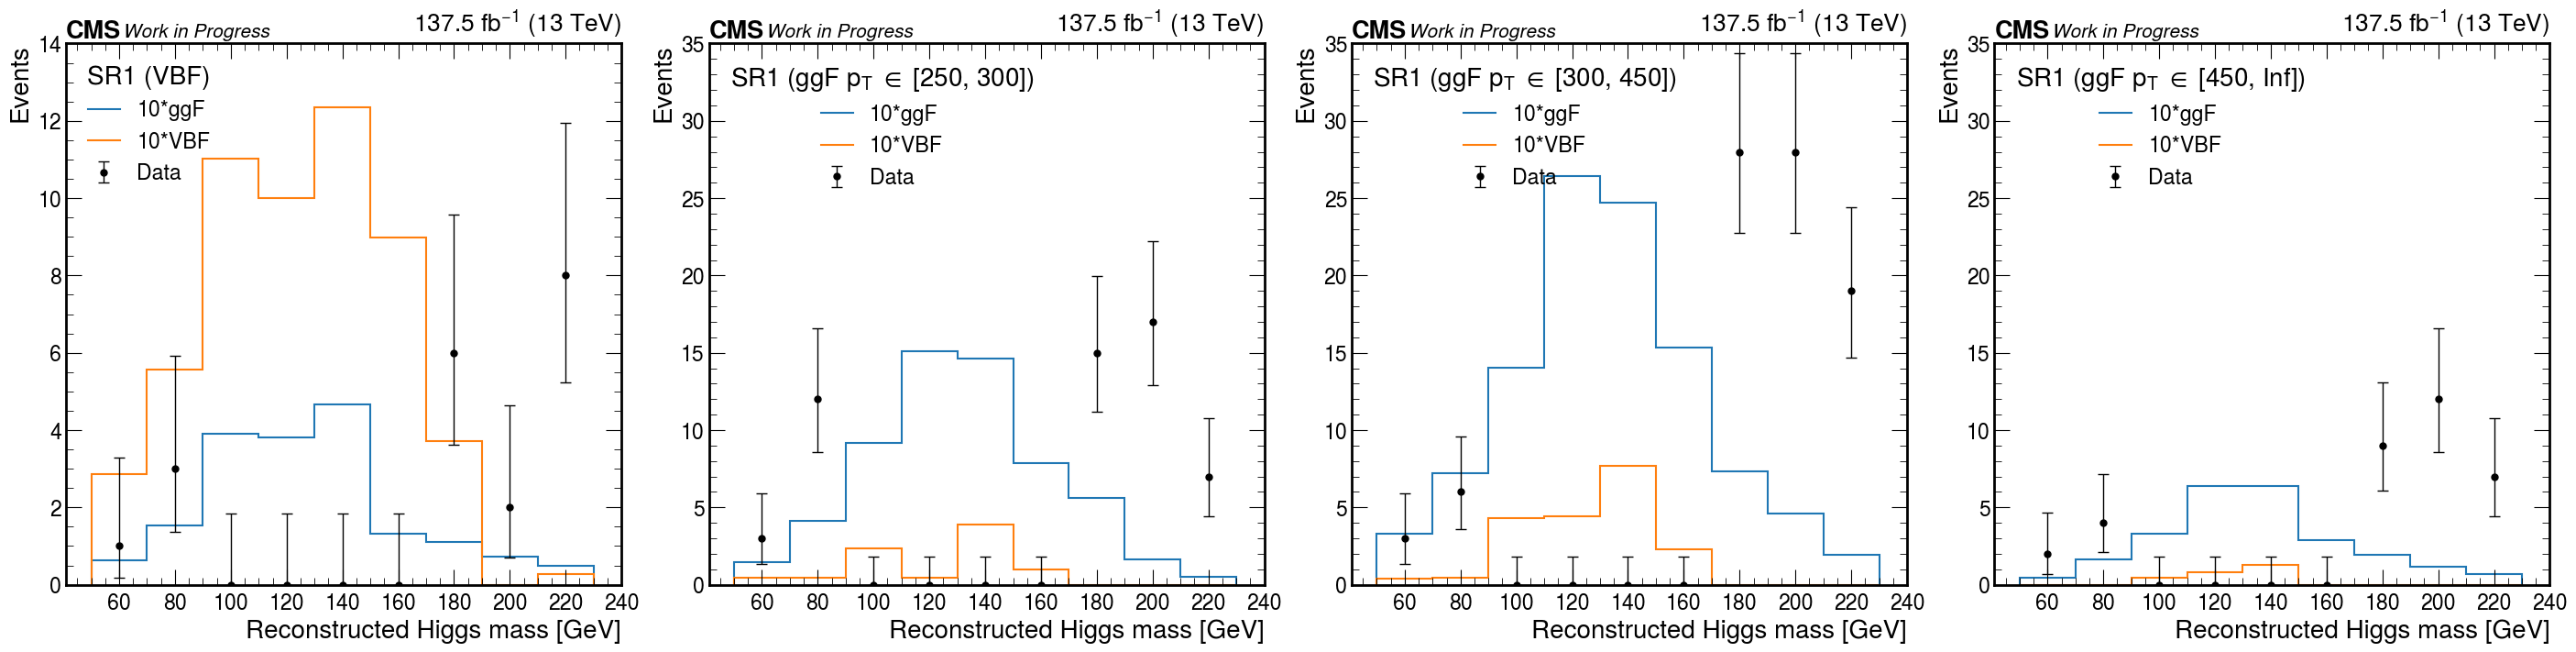

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(28,7), constrained_layout=True)

for region in regions_sel:
    for i, category in enumerate(categories_sel[region]):
        if region=="SR2":
            i=3
        for sample in samples:


            if sample == "Data":
                if blind:
                    hists = blindBins(hists, (blind_region[0],blind_region[1]), blind_samples=["Data"])

                hep.histplot(
                    hists[{"samples": sample, "regions": region, "categories": category}],
                    ax=axs[i],
                    label=sample,
                    histtype="errorbar",
                    color="k",
                    capsize=4,   
                    flow="none"                    
                    
                )   

            else:
                if mult[region]==1:
                    lab = sample            
                else:
                    lab = f"{mult[region]}*{sample}"

                hep.histplot(
                    hists[{"samples": sample, "regions": region, "categories": category}],
                    ax=axs[i],
                    histtype="step",
                    label=lab,
                    flow="none"
                )    
#         if i==3:
#             axs[i].legend(title=f"{region}", loc="upper left")
#         else:
#             axs[i].legend(title=f"{region} ({category})", loc="upper left")

        axs[i].legend(title=f"{region} ({category})", loc="upper left")                

            
        if i==0:
            axs[i].set_ylim(0,14)
        if i==1:
            axs[i].set_ylim(0,35)
        if i==2:
            axs[i].set_ylim(0,35)            
        if i==3:
            axs[i].set_ylim(0,35)
            
            
        axs[i].set_ylabel(f"Events")
        axs[i].set_xlabel(f"Reconstructed Higgs mass [GeV]")
        axs[i].set_ylim(0)    
        hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=axs[i], fontsize=20)
        hep.cms.text("Work in Progress", ax=axs[i], fontsize=15)
        
        axs[i].set_xticks(np.array(list(range(50, 240, 20))) + 10)
    plt.savefig(f"/Users/fmokhtar/Desktop/AN/ww2.pdf")

# QCD

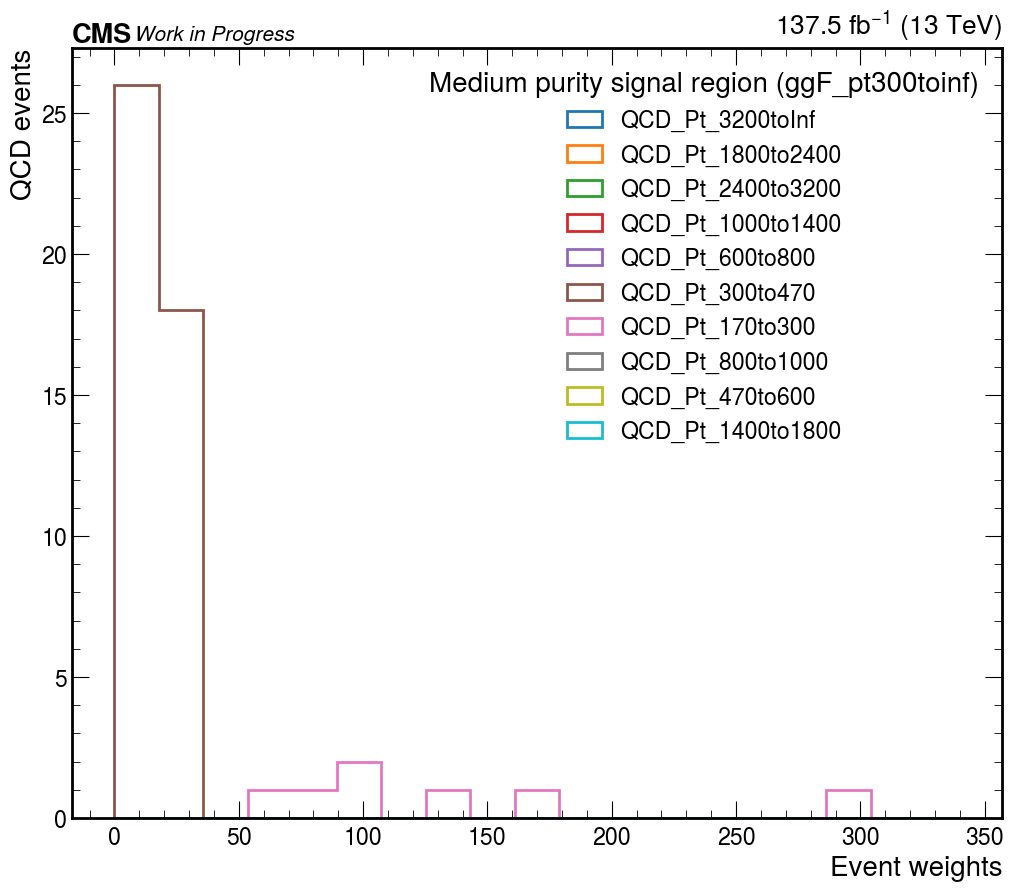

In [573]:
################### option 1
plt.rcParams.update({"font.size": 20})
nice_ch = {
    "ele": "Electron",
    "mu": "Muon",
}

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

region_sel = {
#     "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  
#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
}
categories_sel = {
#     "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
#     "ggF_pt200to300": "( (mjj<1000) & (deta<3.5) & (fj_pt<300) )",
    "ggF_pt300toinf": "( (mjj<1000) & (deta<3.5) & (fj_pt>300) )",
    
}
blind = True
blind_region = (80, 160)
mult = 10

years = ["2018", "2017", "2016APV", "2016"]
sample="QCD"

fig, ax = plt.subplots(figsize=(12,10))    

ws = {}

for sample in events_dict2["signal_region"]["2017"][ch]:
    ws[sample] = []
    for year in years:
        for ch in ["ele", "mu"]:
            try:
                df = events_dict2["signal_region"][year][ch][sample]
            except:
                continue

            for region, sel in region_sel.items():
                df = df.query(sel)

            for category, category_sel in categories_sel.items():
                df = df.query(category_sel)

            w = df[f"event_weight"]
            ws[sample] += w.tolist() 
    
    ws[sample] = np.array(ws[sample])
    ws[sample] = ws[sample][ws[sample]>10]

    bins = 20
    ax.hist(
        ws[sample],
        bins=np.linspace(0,340,bins), 
        histtype="step", 
        linewidth=2, 
        label=sample
    )
#     break

lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0

ax.legend(title=f"{region} ({category})", loc="upper right")

ax.set_ylabel(f"QCD events")
ax.set_xlabel(f"Event weights")  
ax.set_ylim(0)

hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/WWW_QCD_weights_medium_{category}.pdf")        

In [441]:
def plot_ratio(h, years, region1 = "Medium_signal_region", region2 = "QCD_region", sample="QCD", category="VBF", tag=""):
    
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10, 10),
        gridspec_kw={"height_ratios": (4, 2), "hspace": 0.07},
        sharex=True,
    )

    hep.histplot(
        h[{"region": region1, "categories": category}],
        ax=ax,
#         histtype="step",
        histtype="errorbar",        
        label=region1,
        density=True
    )
    hep.histplot(
        h[{"region": region2, "categories": category}],
        ax=ax,
        histtype="step",
        label=region2,
        density=True    
    )

    from hist.intervals import ratio_uncertainty

    data_val = h[{"region": region1, "categories": category}].values()
    tot_val = h[{"region": region2, "categories": category}].values()
    yerr = ratio_uncertainty(data_val, tot_val, "poisson")
    

    data_val /= data_val.sum()
    tot_val /= tot_val.sum()

    print(tot_err_MC)
    hep.histplot(
        data_val / tot_val,
        h[{"region": region1, "categories": category}].axes.edges[0],
        yerr=yerr,
        ax=rax,
        histtype="step",
        color="k",
#         capsize=4,
    )
    
    
    
    
    
    ax.set_xlabel("")
    rax.set_xlabel(f"{h.axes[-1].label}")  # assumes the variable to be plotted is at the last axis

    rax.set_ylabel("Ratio", fontsize=20, loc="center")

    
#     rax.set_ylim(0, 0.004)
#     rax.set_yticks([0, 0.4, 1, 1.4])
    
    rax.axhline(1, ls="--", color="k")    
#     rax.set_ylim(0, 2.5)
#     rax.set_yticks([0, 0.4, 1, 1.4])

    ax.legend(title=category)
    
    lum_ = 0
    for year in years:
        lum = 0
        for ch in ["ele", "mu"]:
            with open("../fileset/luminosity.json") as f:
                lum += json.load(f)[ch][year] / 1000.0

        lum_ += lum / len(channels)

    hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)

    hep.cms.text("Work in Progress", ax=ax, fontsize=15)
    
    
    ax.set_ylabel(f"Normalized {sample} events")
    
    if tag:
        plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku3/ratio_{sample}_{tag}.pdf")        
    else:
        plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku3/ratio_{sample}.pdf")   

In [442]:
tagger = "fj_ParT_score_finetuned"
presel = {
    "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
    "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",
    "0.85>Tagger>0.20": f"({tagger}<0.85) & ({tagger}>0.20)",

#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
    
#     "Top control region": f"({tagger}<0.20) & (n_bjets_T>0)",  
    "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  

}

categories_sel = {
    "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
    "ggF_pt200to300": "( (mjj<1000) & (deta<3.5) & (fj_pt<300) )",
    "ggF_pt300toinf": "( (mjj<1000) & (deta<3.5) & (fj_pt>300) )",
    
}
            
channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

sample = "QCD"

# fill histograms
hists = {}
for var in vars_to_plot:
            
    if var == "rec_higgs_m":
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="region", growth=True),
            hist2.axis.StrCategory([], name="categories", growth=True),            
            hist2.axis.Variable(
                list(range(50, 240, 20)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
            )
        )
    else:
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="region", growth=True),
            utils.axis_dict[var],
        )
        
    for year in years:
        for ch in channels:
                
            for region, region_sel in presel.items():
                for category, category_sel in categories_sel.items():
                
                    if "QCD control region" in region:
                        df = events_dict["qcd_region"][year][ch][sample]
                    else:
                        df = events_dict["signal_region"][year][ch][sample]

                    if "High" in region:
                        if sample == "QCD":
                            df = df[df["event_weight"]<140]
                    elif "Medium" in region:
                        if sample == "QCD":
                            df = df[df["event_weight"]<200]

                    df = df.query(region_sel)
                    df = df.query(category_sel)

                    hists[var].fill(
                        region=region,
                        categories=category,
                        mass_observable=df[var],
                        weight=df["event_weight"],
                    )     

KeyError: 'signal_region'

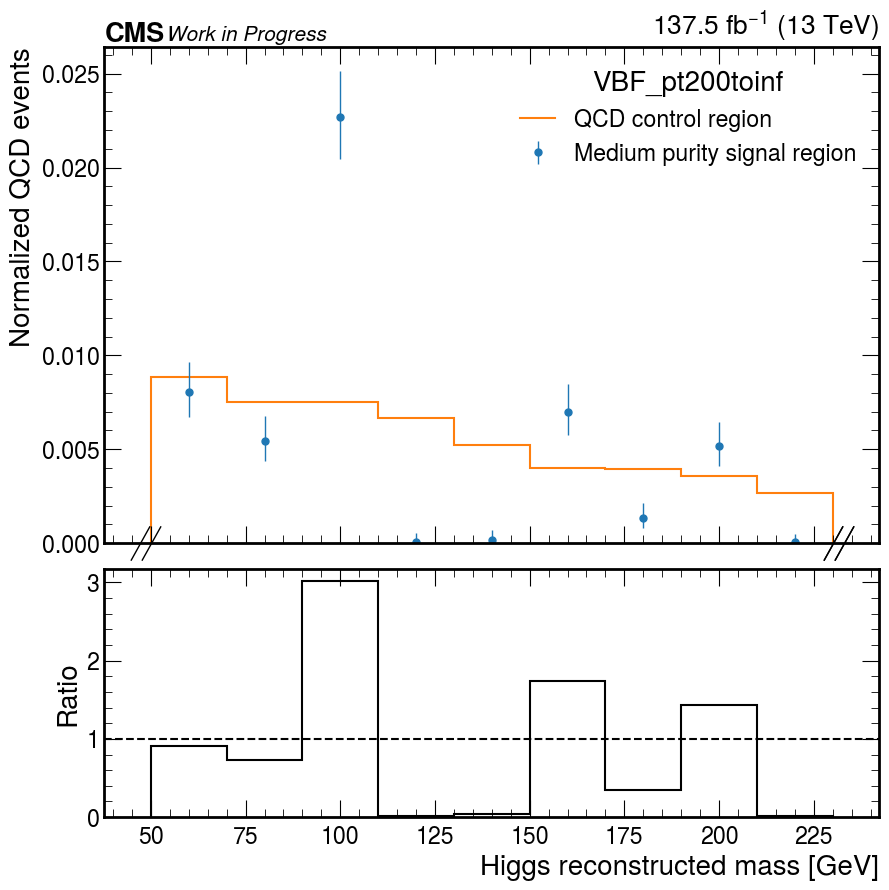

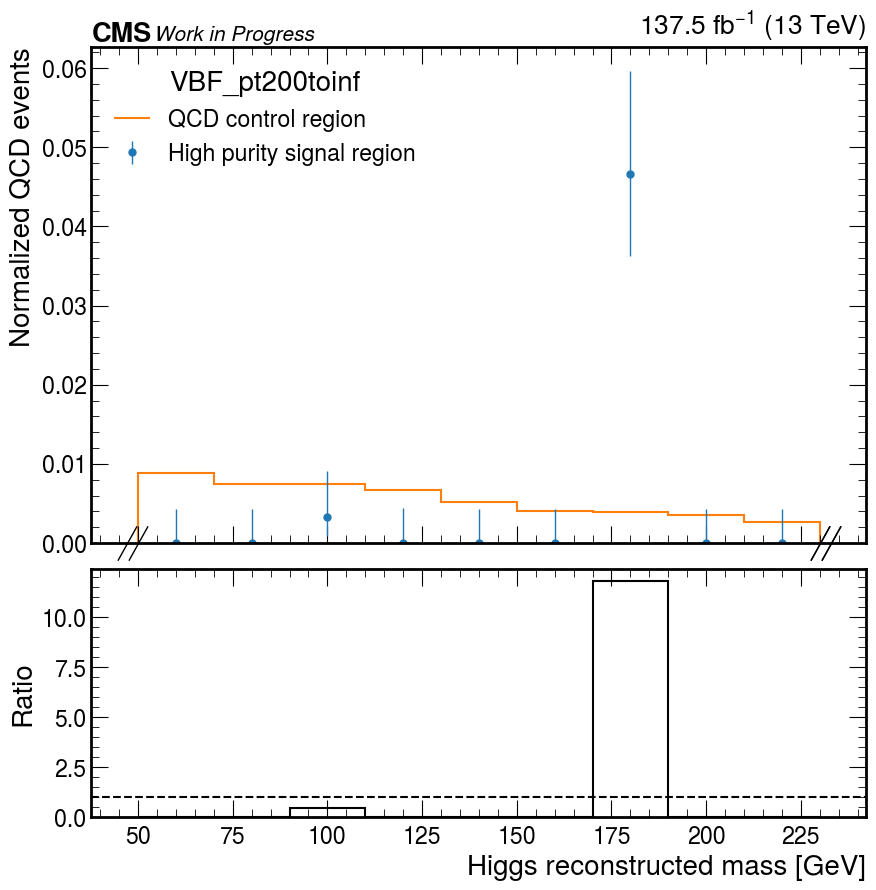

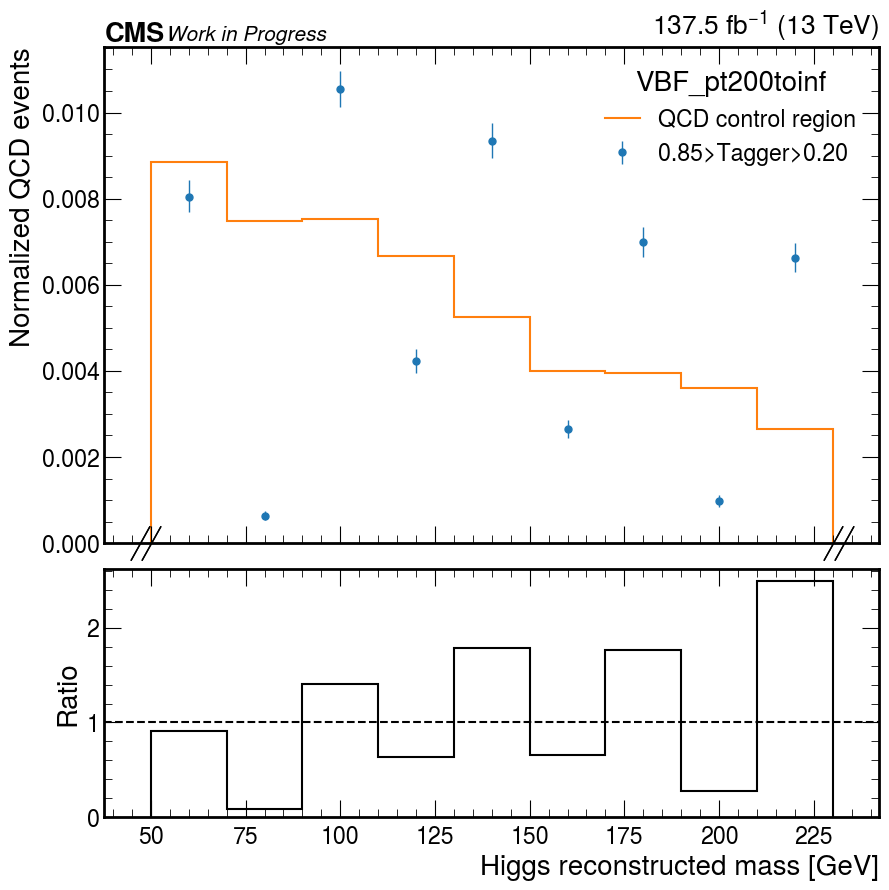

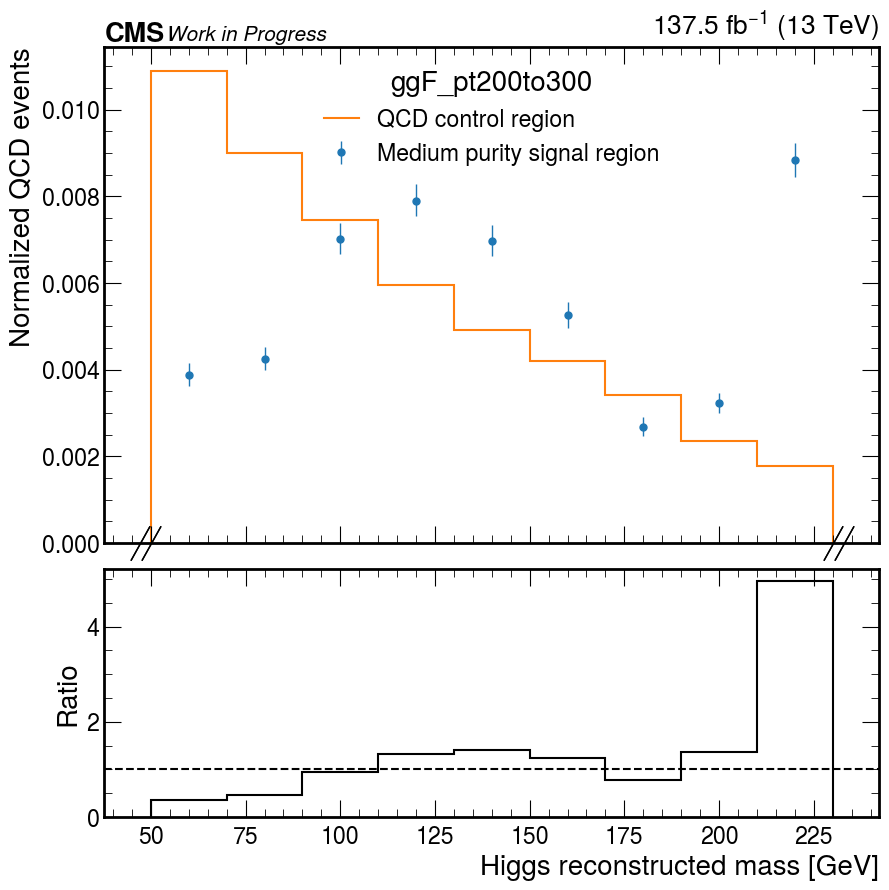

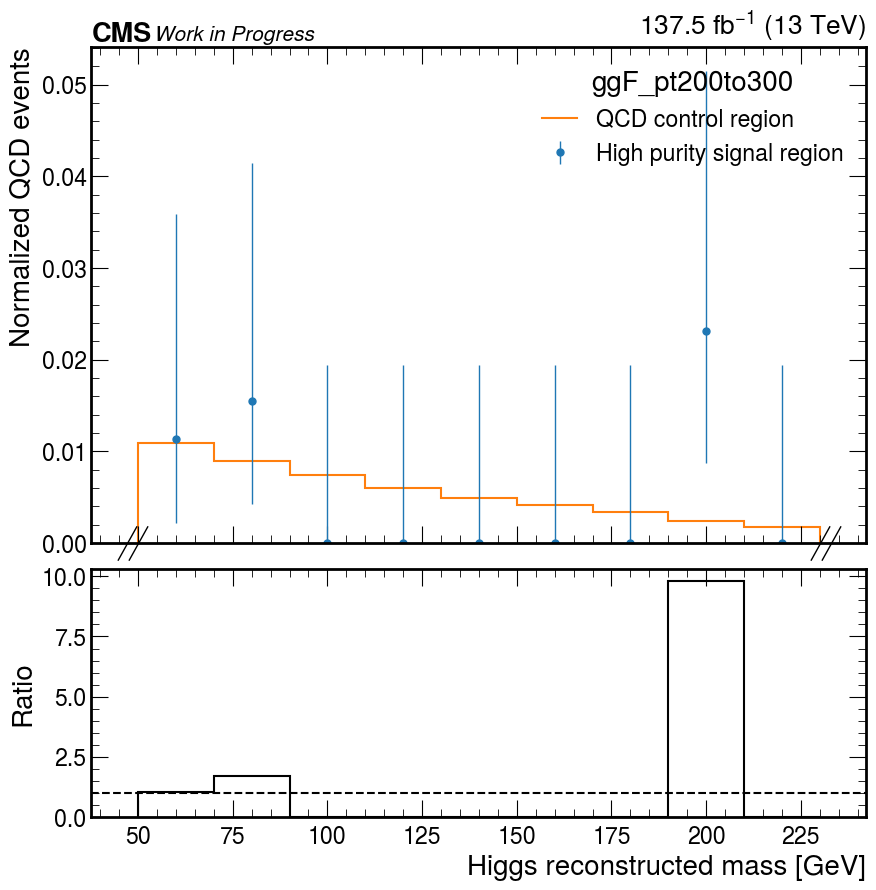

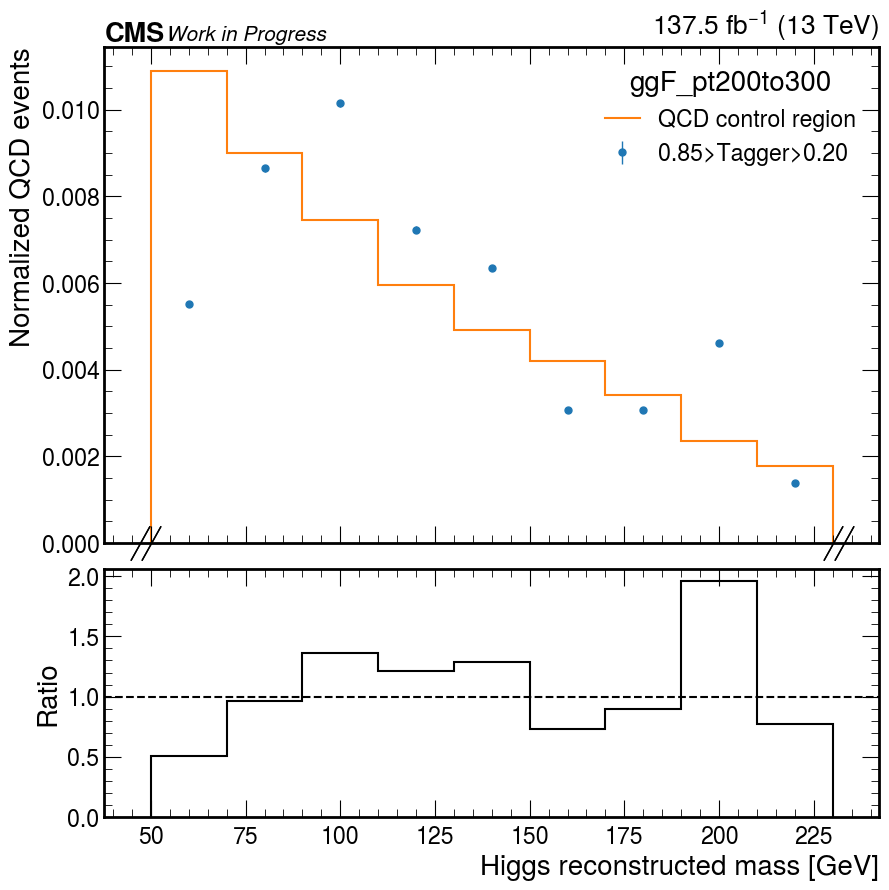

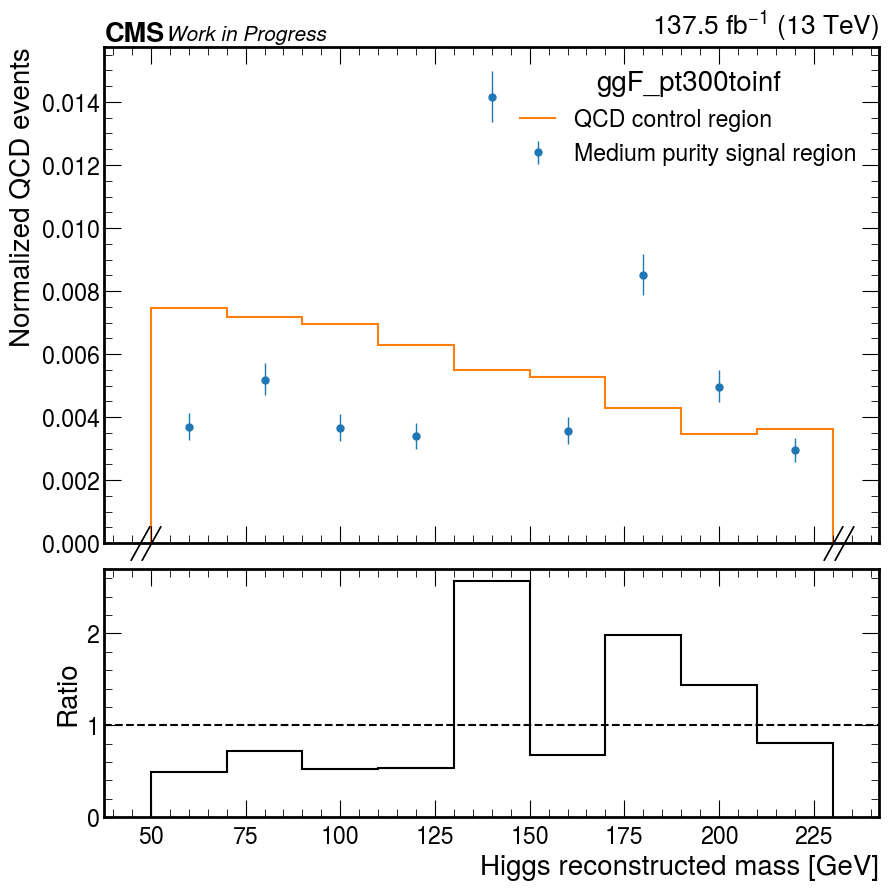

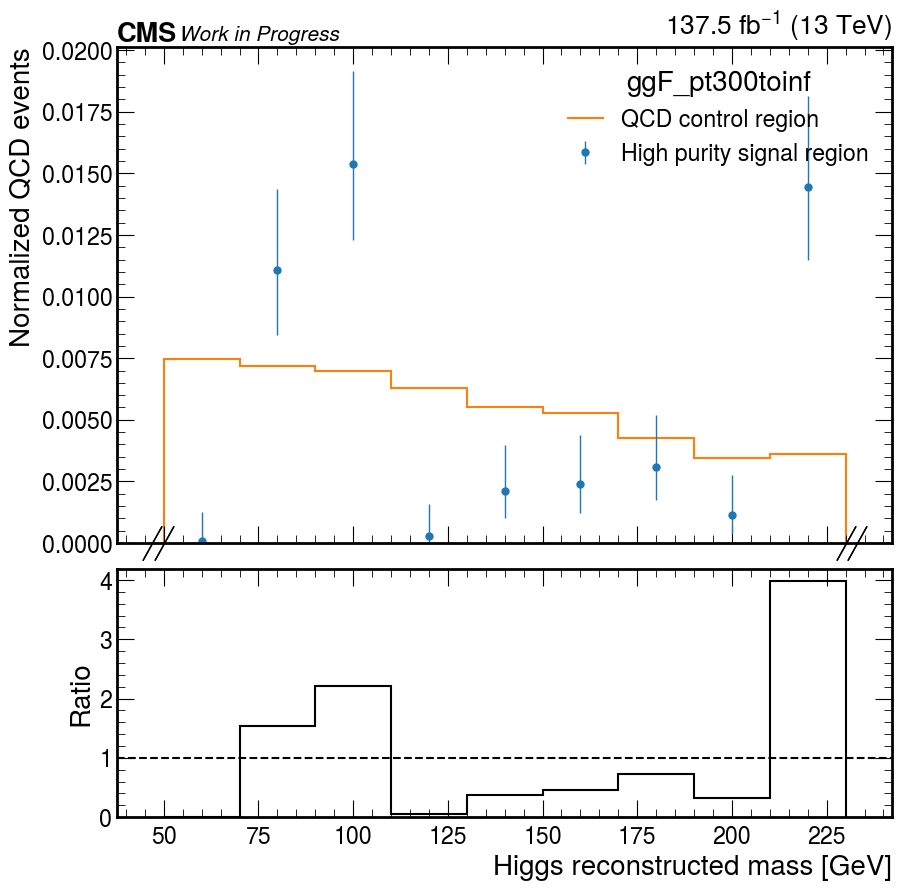

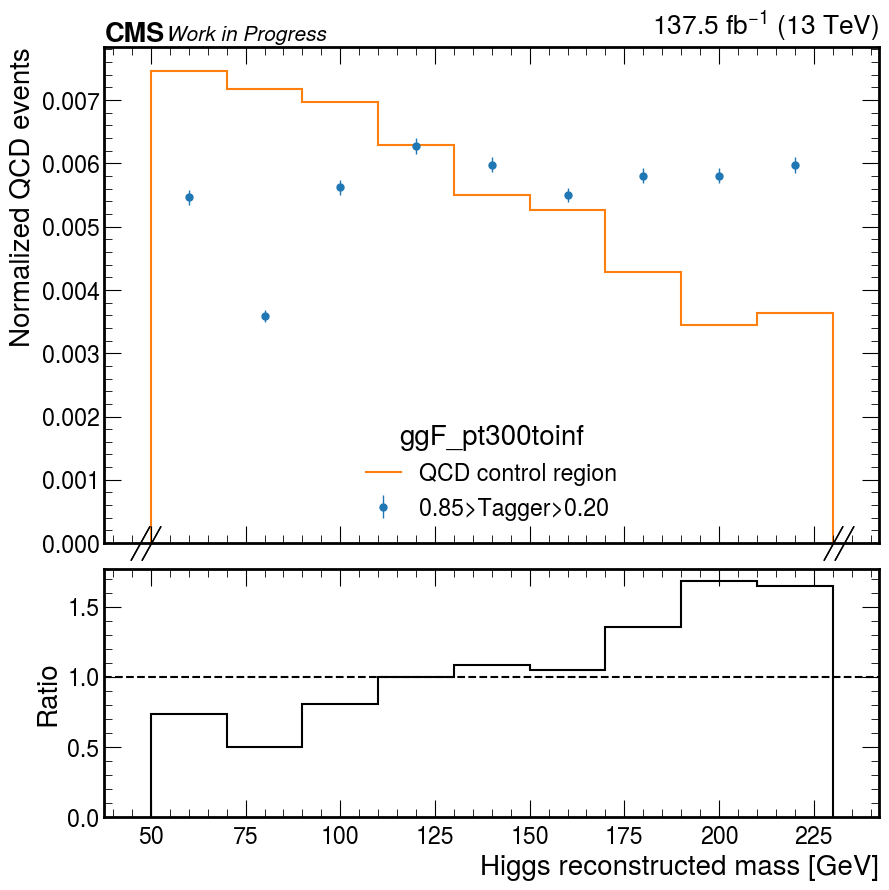

In [754]:
region_dic = {
    "Medium purity signal region": "medium",
    "High purity signal region": "high",
    "0.85>Tagger>0.20": "low",    
}

for category in ["VBF_pt200toinf", "ggF_pt200to300", "ggF_pt300toinf"]:
    
    for region in region_dic:
        plot_ratio(hists["rec_higgs_m"], 
                   years, 
                   region1 = region,
                   region2 = "QCD control region",
                   sample=sample,
                   category=category,
                   tag=f"{category}_{region_dic[region]}"
                  )

In [ ]:
fig, ax = plt.subplots(figsize=(14, 11))
ax.hist(
    x, 
    bins=np.linspace(50,300,bins), 
    weights=w,
    density=True, 
    histtype="step", 
    linewidth=2, 
    label=rf"{k} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
)

ax.axvline(125, color="grey", linestyle="--", label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0)

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/mass_sculpting_{sample}.pdf")        

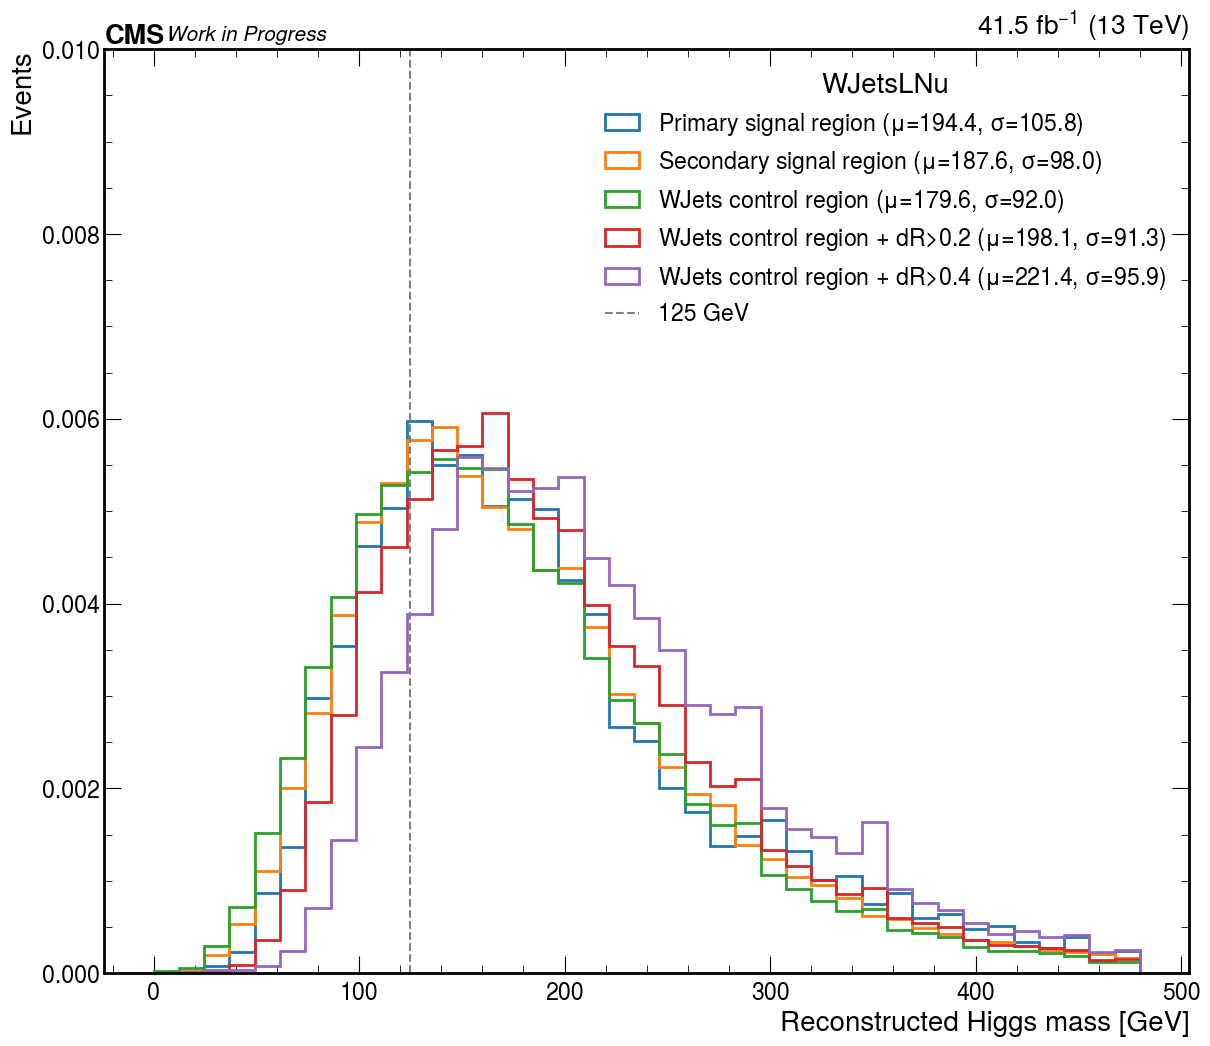

In [140]:
fig, ax = plt.subplots(figsize=(14, 12))
for region, sel in presel.items():

    df1 = df.copy().query(sel)

    x = df1["rec_higgs_m"]
    ax.hist(
        x, 
        bins=np.linspace(0,480,bins), 
        weights=df1["weight"],
        density=True, 
        histtype="step", 
        linewidth=2, 
        label=rf"{region} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
    )

ax.axvline(125, color="grey", linestyle="--", label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0, 0.01)

luminosity = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    luminosity += lum / len(channels)    
        
hep.cms.lumitext("%.1f " % luminosity + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakiko/{sample}.pdf")  